# Credit Card Fraud Detection

# Problem Statment
For many Banks,retaining high profitable customers is the number one Business Goal. Banking Fraud however possesses significant threat to this goal for different banks in terms of substantial financial losses trust and credibility this is becoming a concerning issue for both Banks and Customers alike.

In the banking industry credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine Learning is thus helping these institutions to reduce time consuming manual reviews costly chargebacks and fees as well as denial of legitimate transactions

In this project we will detect fraudulent credit card transactions with the help of machine learning models. We will analyze customer level data that has been collected and analyzed during a research collaboration of worldwide and the Machine Learning Group.

# Data Ubderstanding
The dataset contains transactions made by credit cards European cardholders.This dataset presents transactions that occurred in two days, where i have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, it cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Table of Content

Importing Dependencies
Exploratory Data Analysis
Spliting the data into Train & Test data
Model Building . Perform Cross Validation with Repeatedkfold . Perform Cross Validation with Stratifiedkfold . Randomoversampler with Stratifiedkfold cross calidation . Over Sampling with SMOTE oversampling . Over Sampling with ADASYN oversampling
Hyperparameter Tunning
Conclusion

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [5]:
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [6]:
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [7]:
#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


In [8]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
#To read csv File from locally stored file
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [10]:
# Examining the dataset imported:
df.shape

(284807, 31)

In [11]:
# Lets check the numeric distribution of the data:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ... -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [12]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# checking the distribution of numerical values 
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ... -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [14]:
#Check the fraud/Non_Fraud related records
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [15]:
#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

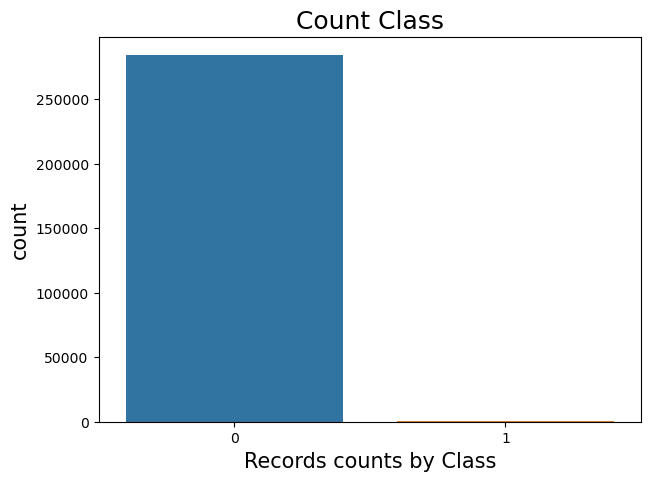

In [16]:
# Creating a bar plot and percentage of fraudent vs non fraudent transaction
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Class')
plt.title('Count Class', fontsize= 18)
plt.xlabel("Records counts by Class",fontsize= 15)
plt.ylabel("count", fontsize= 15)
plt.show()

In [17]:
# Chekking correlation
crr = df.corr()
crr

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  3.777823e-12 -2.118614e-12 -1.733159e-13   
V2     -0.010593  3.777823e-12  1.000000e+00  2.325661e-12 -2.314981e-12   
V3     -0.419618 -2.118614e-12  2.325661e-12  1.000000e+00  2.046235e-13   
V4     -0.105260 -1.733159e-13 -2.314981e-12  2.046235e-13  1.000000e+00   
V5      0.173072 -3.473231e-12 -1.831952e-12 -4.032993e-12 -2.552389e-13   
V6     -0.063016 -1.306165e-13  9.438444e-13 -1.574471e-13  1.084041e-12   
V7      0.084714 -1.116494e-13  5.403436e-12  3.405586e-12  8.135064e-13   
V8     -0.036949  2.114527e-12  2.133785e-14 -1.272385e-12  7.334818e-13   
V9     -0.008660  3.016285e-14  3.238513e-13 -6.812351e-13 -7.143069e-13   
V10     0.030617 -2.615192e-12  1.463282e-12 -1.609126e-12 -1.938143e-12   
V11    -0.247689  1.866551e-12 -8.314960e-13  8.707055e-13  1.874473e-12   
V12     0.124348 -1.238745e-12  6.139448e-13 -2.730043e-12  5.393827e-13   
V13    -0.065902  7.589589e-13 -1.181068e-12 -1.020592e-12  6.813810e-13   
V14    -0.098757 -1.871054e-13 -3.384684e-13 -5.597874e-13 -1.404120e-12   
V15    -0.183453 -3.601390e-13  2.196083e-13  6.442512e-13  1.526382e-12   
V16     0.011903 -1.142884e-12 -8.000510e-13 -8.748795e-13  3.095722e-13   
V17    -0.073297  1.671073e-12  2.028957e-12 -1.058101e-12  1.151414e-14   
V18     0.090438 -5.738830e-13 -1.916566e-14 -8.846578e-13 -1.309615e-12   
V19     0.028975 -2.770259e-12 -2.237098e-13 -1.061131e-12 -9.754131e-13   
V20    -0.050866  2.662926e-13  5.839893e-13  1.873059e-12 -2.347029e-12   
V21     0.044736 -3.276238e-12  2.280202e-12  6.736294e-13 -2.696370e-12   
V22     0.144059  2.281863e-12 -2.548560e-13 -8.909339e-13  4.347776e-13   
V23     0.051142 -2.969746e-12 -4.856120e-12  4.147209e-12 -4.160969e-12   
V24    -0.016182 -1.029876e-12  6.431308e-13  3.407636e-12 -2.368743e-12   
V25    -0.233083  1.144179e-12 -9.423730e-13  5.712956e-13  1.619944e-12   
V26    -0.041407  1.835263e-12 -4.129100e-13 -2.577274e-12 -3.043100e-13   
V27    -0.005135  7.624804e-12 -9.856545e-13 -5.041444e-12 -1.456066e-12   
V28    -0.009413 -9.769215e-13  2.525513e-12  5.189109e-12 -2.832372e-12   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1     -3.473231e-12 -1.306165e-13 -1.116494e-13  2.114527e-12  3.016285e-14   
V2     -1.831952e-12  9.438444e-13  5.403436e-12  2.133785e-14  3.238513e-13   
V3     -4.032993e-12 -1.574471e-13  3.405586e-12 -1.272385e-12 -6.812351e-13   
V4     -2.552389e-13  1.084041e-12  8.135064e-13  7.334818e-13 -7.143069e-13   
V5      1.000000e+00 -6.934789e-14  1.573956e-11 -2.038243e-12 -1.000756e-12   
V6     -6.934789e-14  1.000000e+00 -2.798968e-12 -5.446480e-13  2.036743e-12   
V7      1.573956e-11 -2.798968e-12  1.000000e+00  5.528803e-12  5.088082e-13   
V8     -2.038243e-12 -5.446480e-13  5.528803e-12  1.000000e+00 -2.243172e-12   
V9     -1.000756e-12  2.036743e-12  5.088082e-13 -2.243172e-12  1.000000e+00   
V10    -7.200329e-13  7.429770e-13  1.674650e-12 -1.660630e-12  1.185391e-12   
V11    -5.928181e-13  1.014893e-12 -8.525291e-13  1.296877e-12 -3.970652e-13   
V12     1.812994e-12 -9.265590e-13 -2.826770e-13 -3.860109e-13 -1.904908e-12   
V13    -7.021996e-14  1.484679e-12 -8.171731e-13  7.722897e-13  8.754859e-13   
V14    -1.113015e-13 -1.212766e-12  2.038217e-12 -2.596182e-12 -1.271311e-12   
V15    -1.593594e-12 -1.053548e-12  1.074440e-12  1.648898e-12  8.628709e-13   
V16    -1.619090e-14  1.374197e-12 -1.478776e-12 -1.830899e-12  1.239835e-12   
V17     1.713794e-13  7.431528e-13 -1.231314e-12  7.025405e-13 -1.450585e-12   
V18     1.101433e-12  6.859871e-13 -4.281952e-13  1.499555e

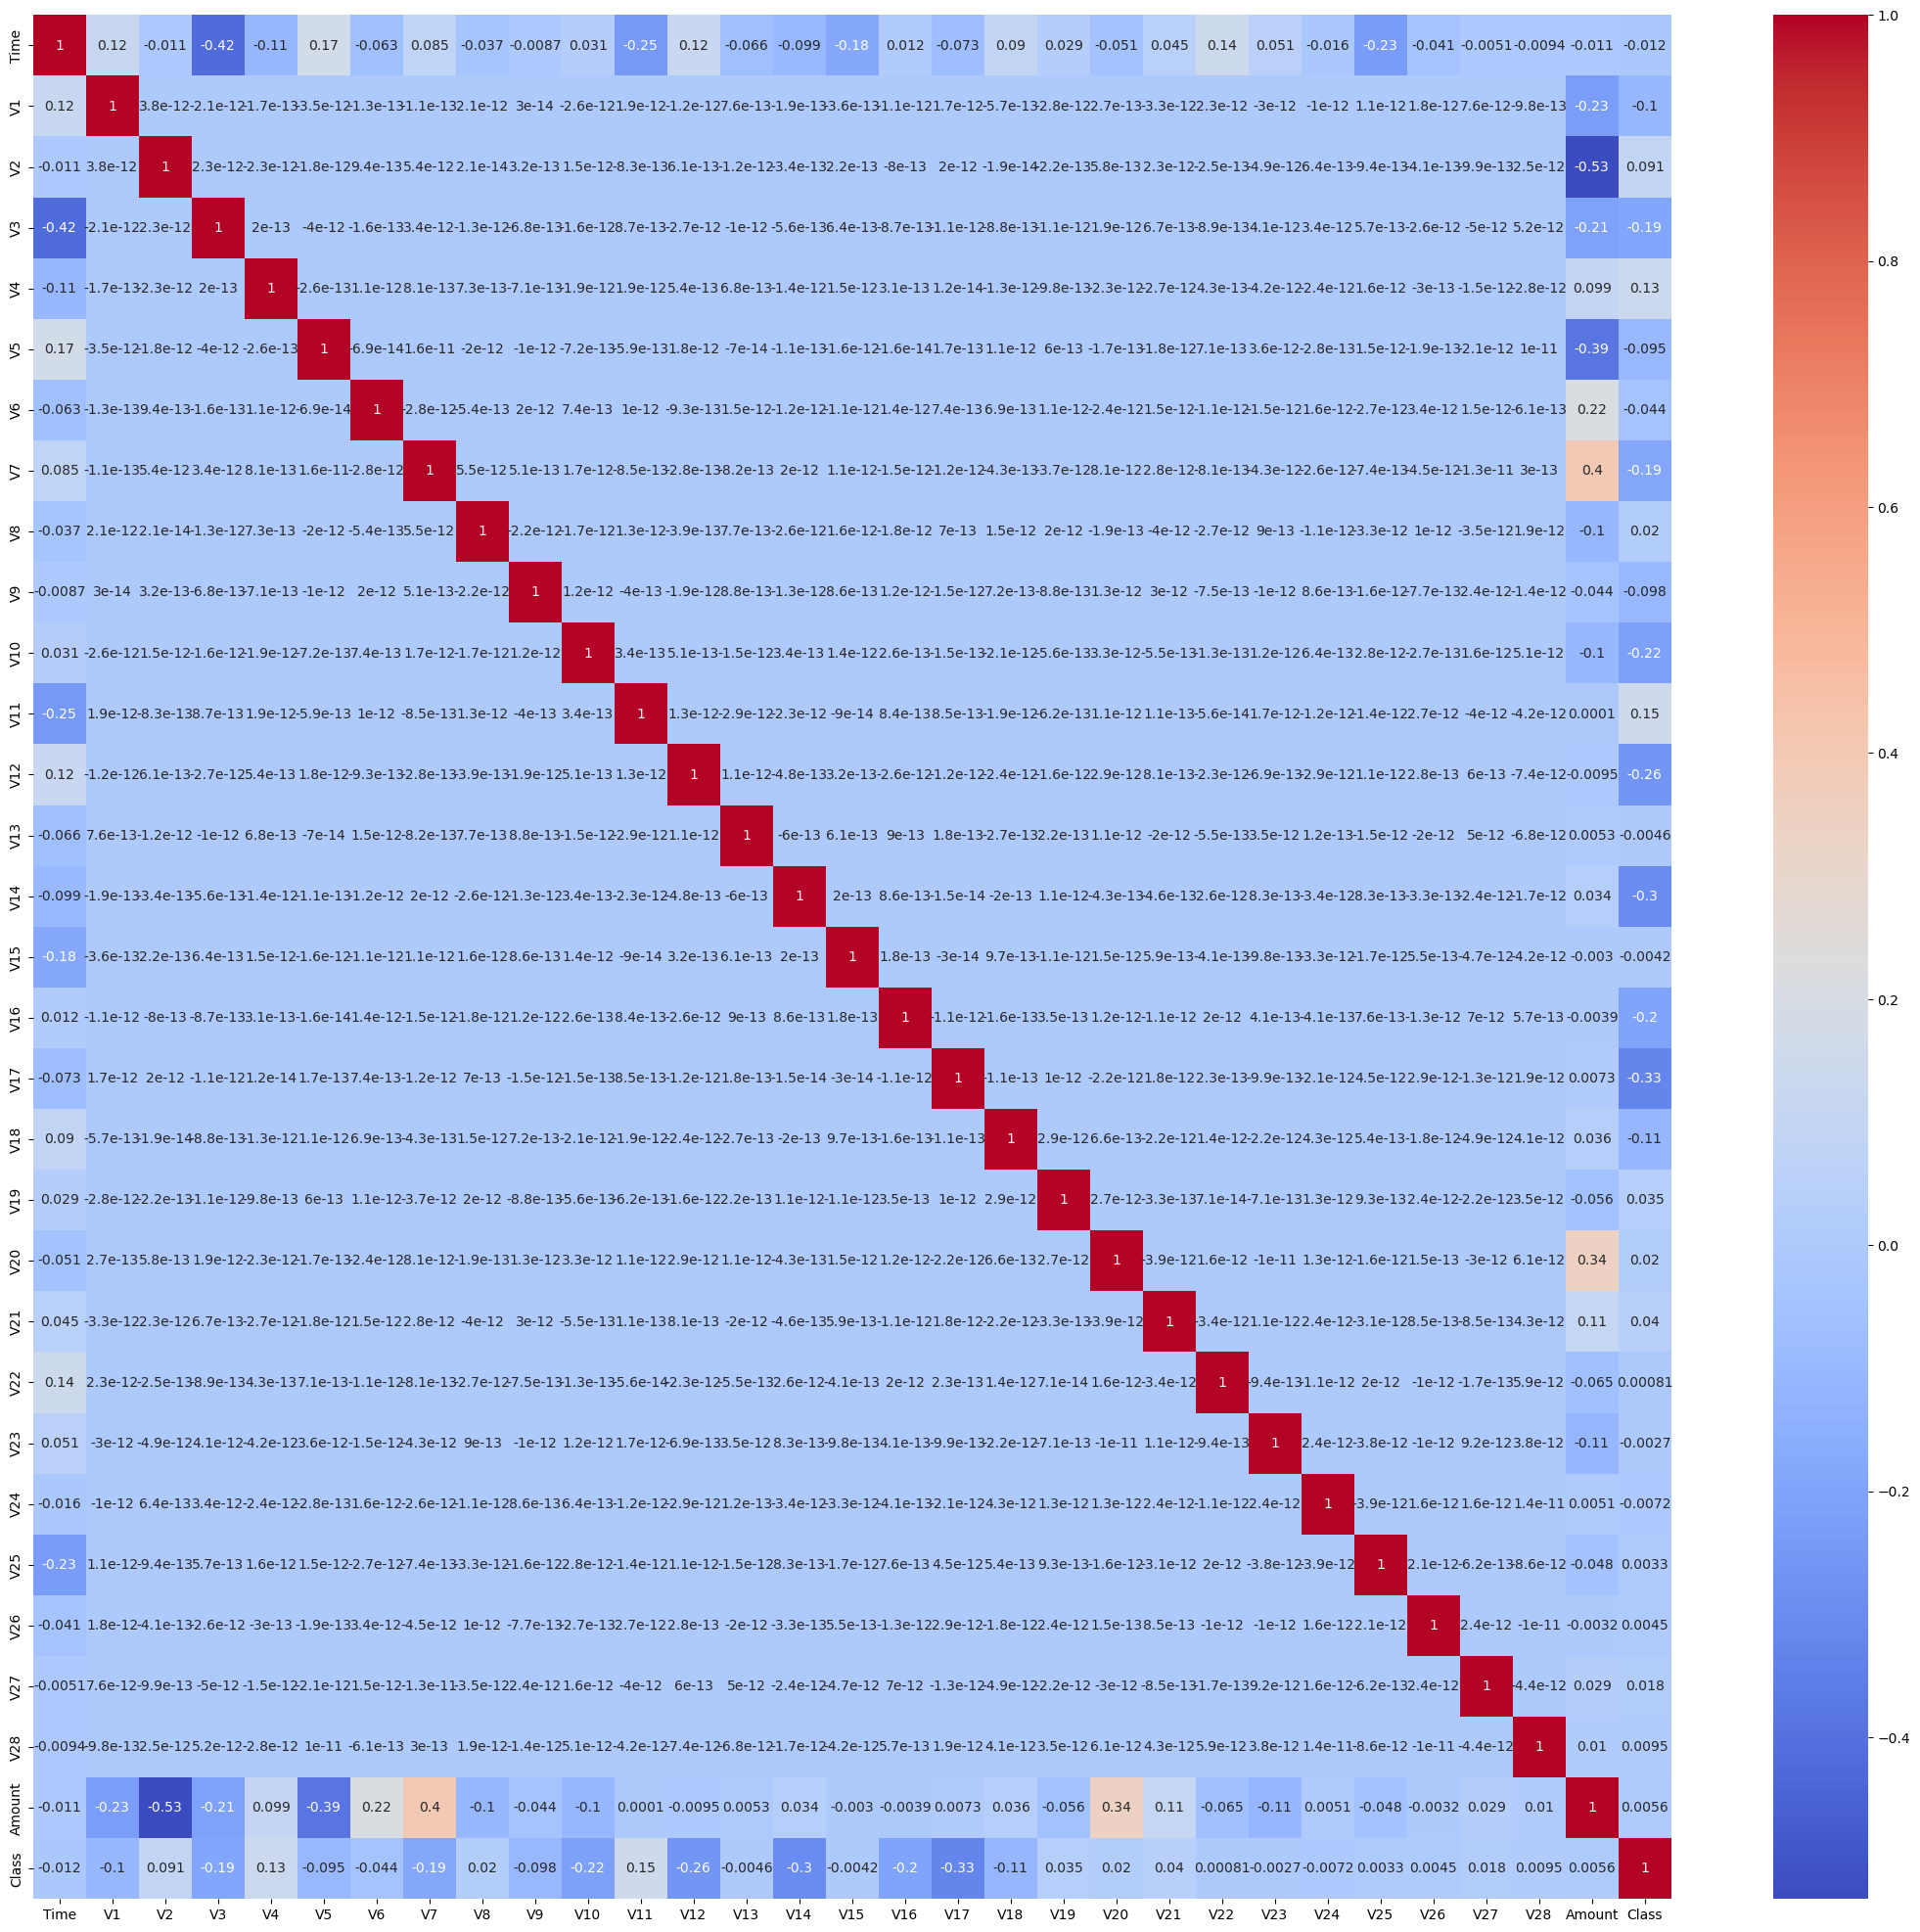

In [18]:
# Chekking correlation with heatmap
plt.figure(figsize=(27,25))
sns.heatmap(crr ,cmap='coolwarm' , annot = True)
plt.show()

99.82725143693798
0.1727485630620034


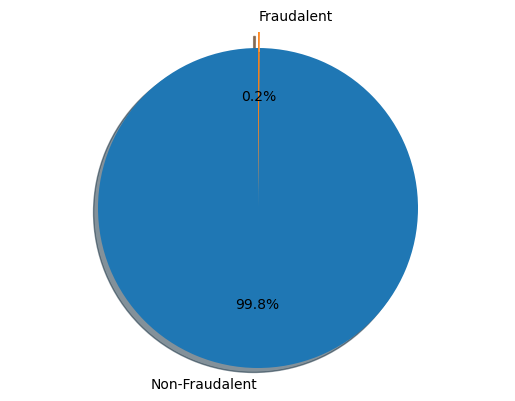

In [19]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [20]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


# So we have 492 fraudalent transactions out of 284807 total credit card transactions.
Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc

In [21]:
#check if any null values
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
#observe the different feature type present in the data
#lets check data types of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Feature Engeneering on Time Column using panda delta time function

In [23]:
Delta_time = pd.to_timedelta(df['Time'] ,  unit= 's')

In [24]:
# creating derivve columns min and hour
df["Time_Day"] = (Delta_time.dt.components.days).astype(int)
df["Time_Min"] = (Delta_time.dt.components.minutes).astype(int)
df["Time_Hour"] = (Delta_time.dt.components.hours).astype(int)

In [25]:
#Droping unnecessary columns
# Dropping time as we derived hour/minute/day columns, i will keep only hour columns and droping other columns
df.drop('Time', axis =1 ,inplace = True)
df.drop(['Time_Day','Time_Min'], axis =1 ,inplace = True)

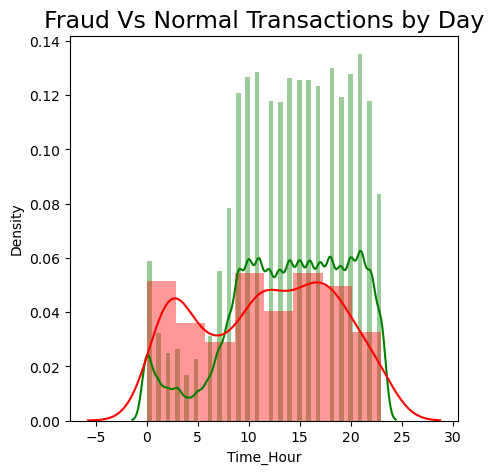

In [26]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

In [27]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

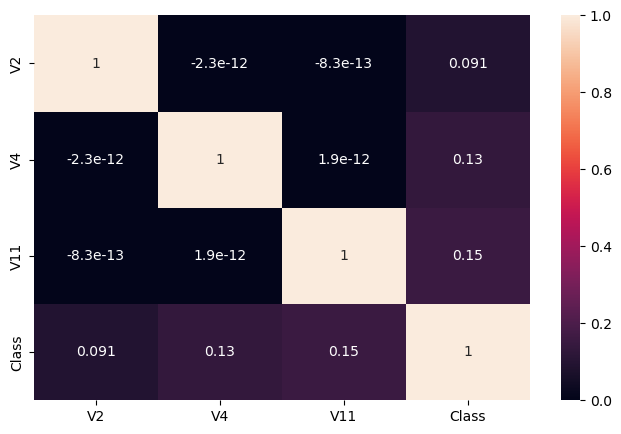

In [28]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:
crr = df.corr()
top_feature = crr.index[abs(crr['Class'] > 0.09)]

plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

# Plotting the distribution of a variable

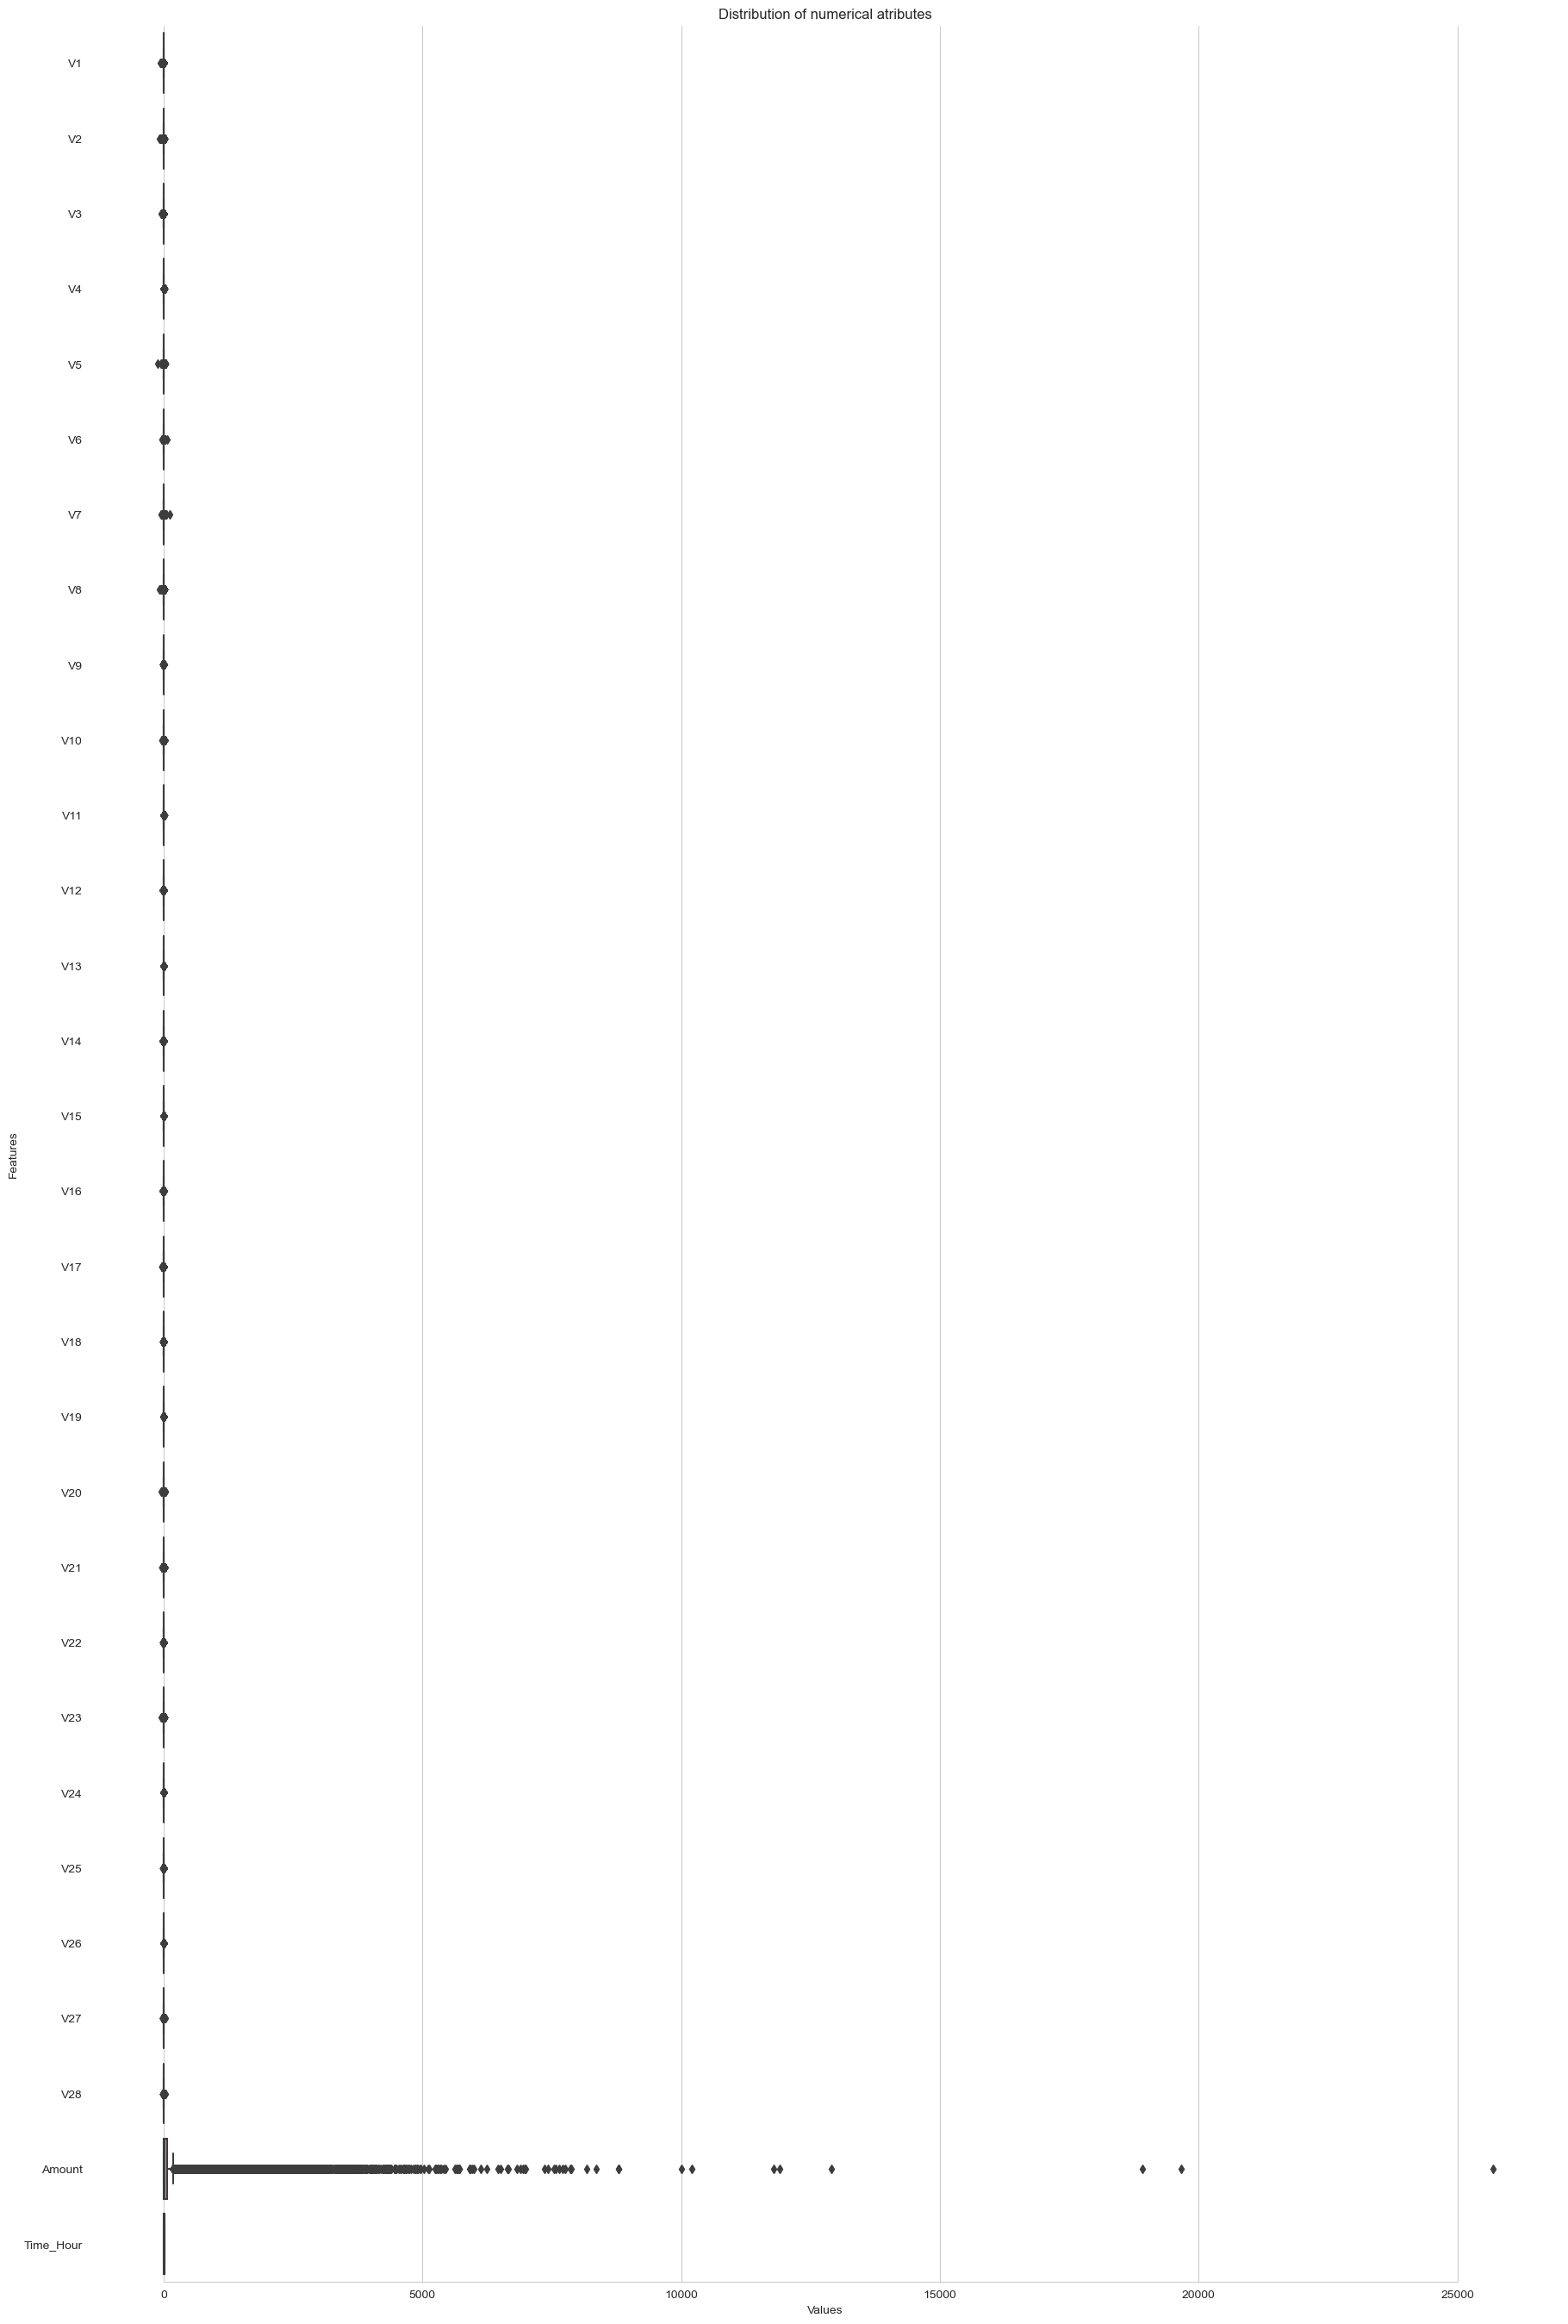

In [29]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

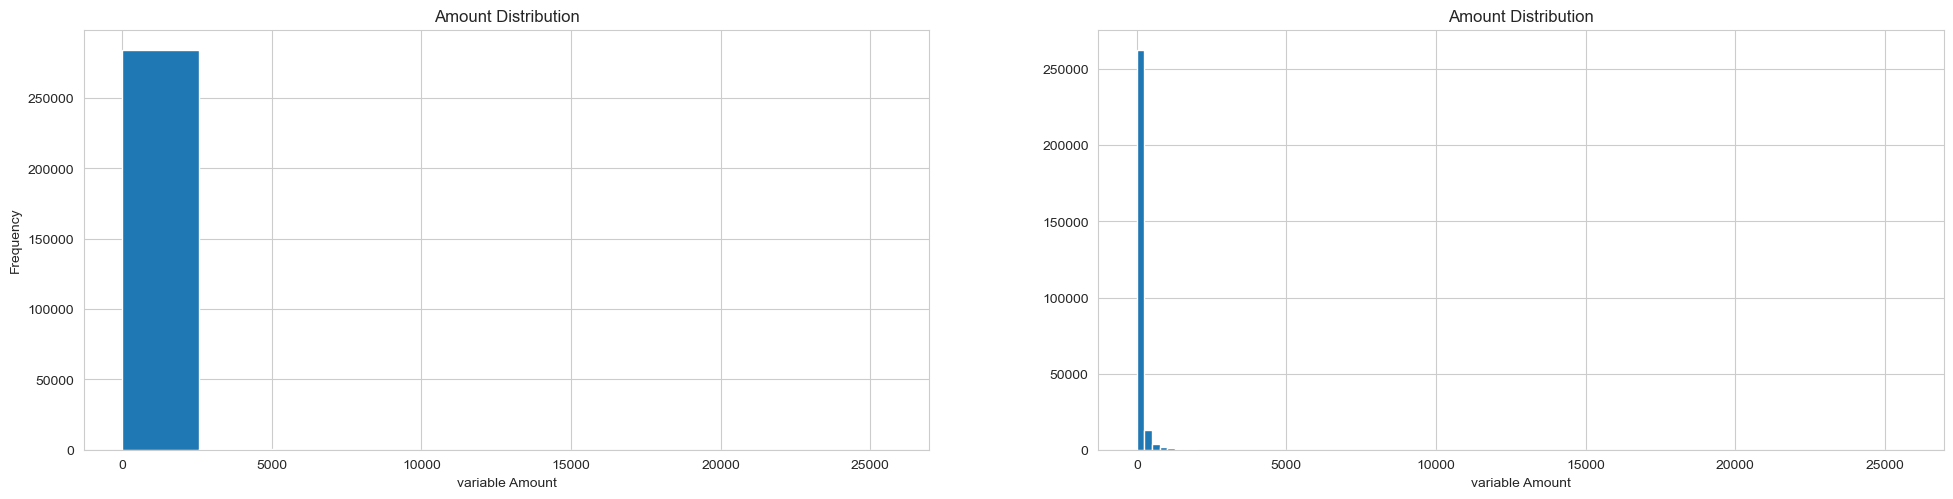

In [30]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))
plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")
plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

# Splitting data into Train and test data

In [31]:
# Splitting data in to X & Y
y= df['Class']
X= df.drop(['Class'], axis= 1)

In [32]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [34]:
# Splitting the data set by train test split
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

# Preserve X_test & y_test to evaluate on the test data once you build the model

In [35]:
# Chekking the split of train data
print(np.sum(y))

print(np.sum(y_train))

print(np.sum(y_test))

492
396
96


In [36]:
#Plotting a distribution of a variable

# Acumulating all the columns name under one variable
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

In [37]:
# Plotting a histogram from a variable in data set to see the skeewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

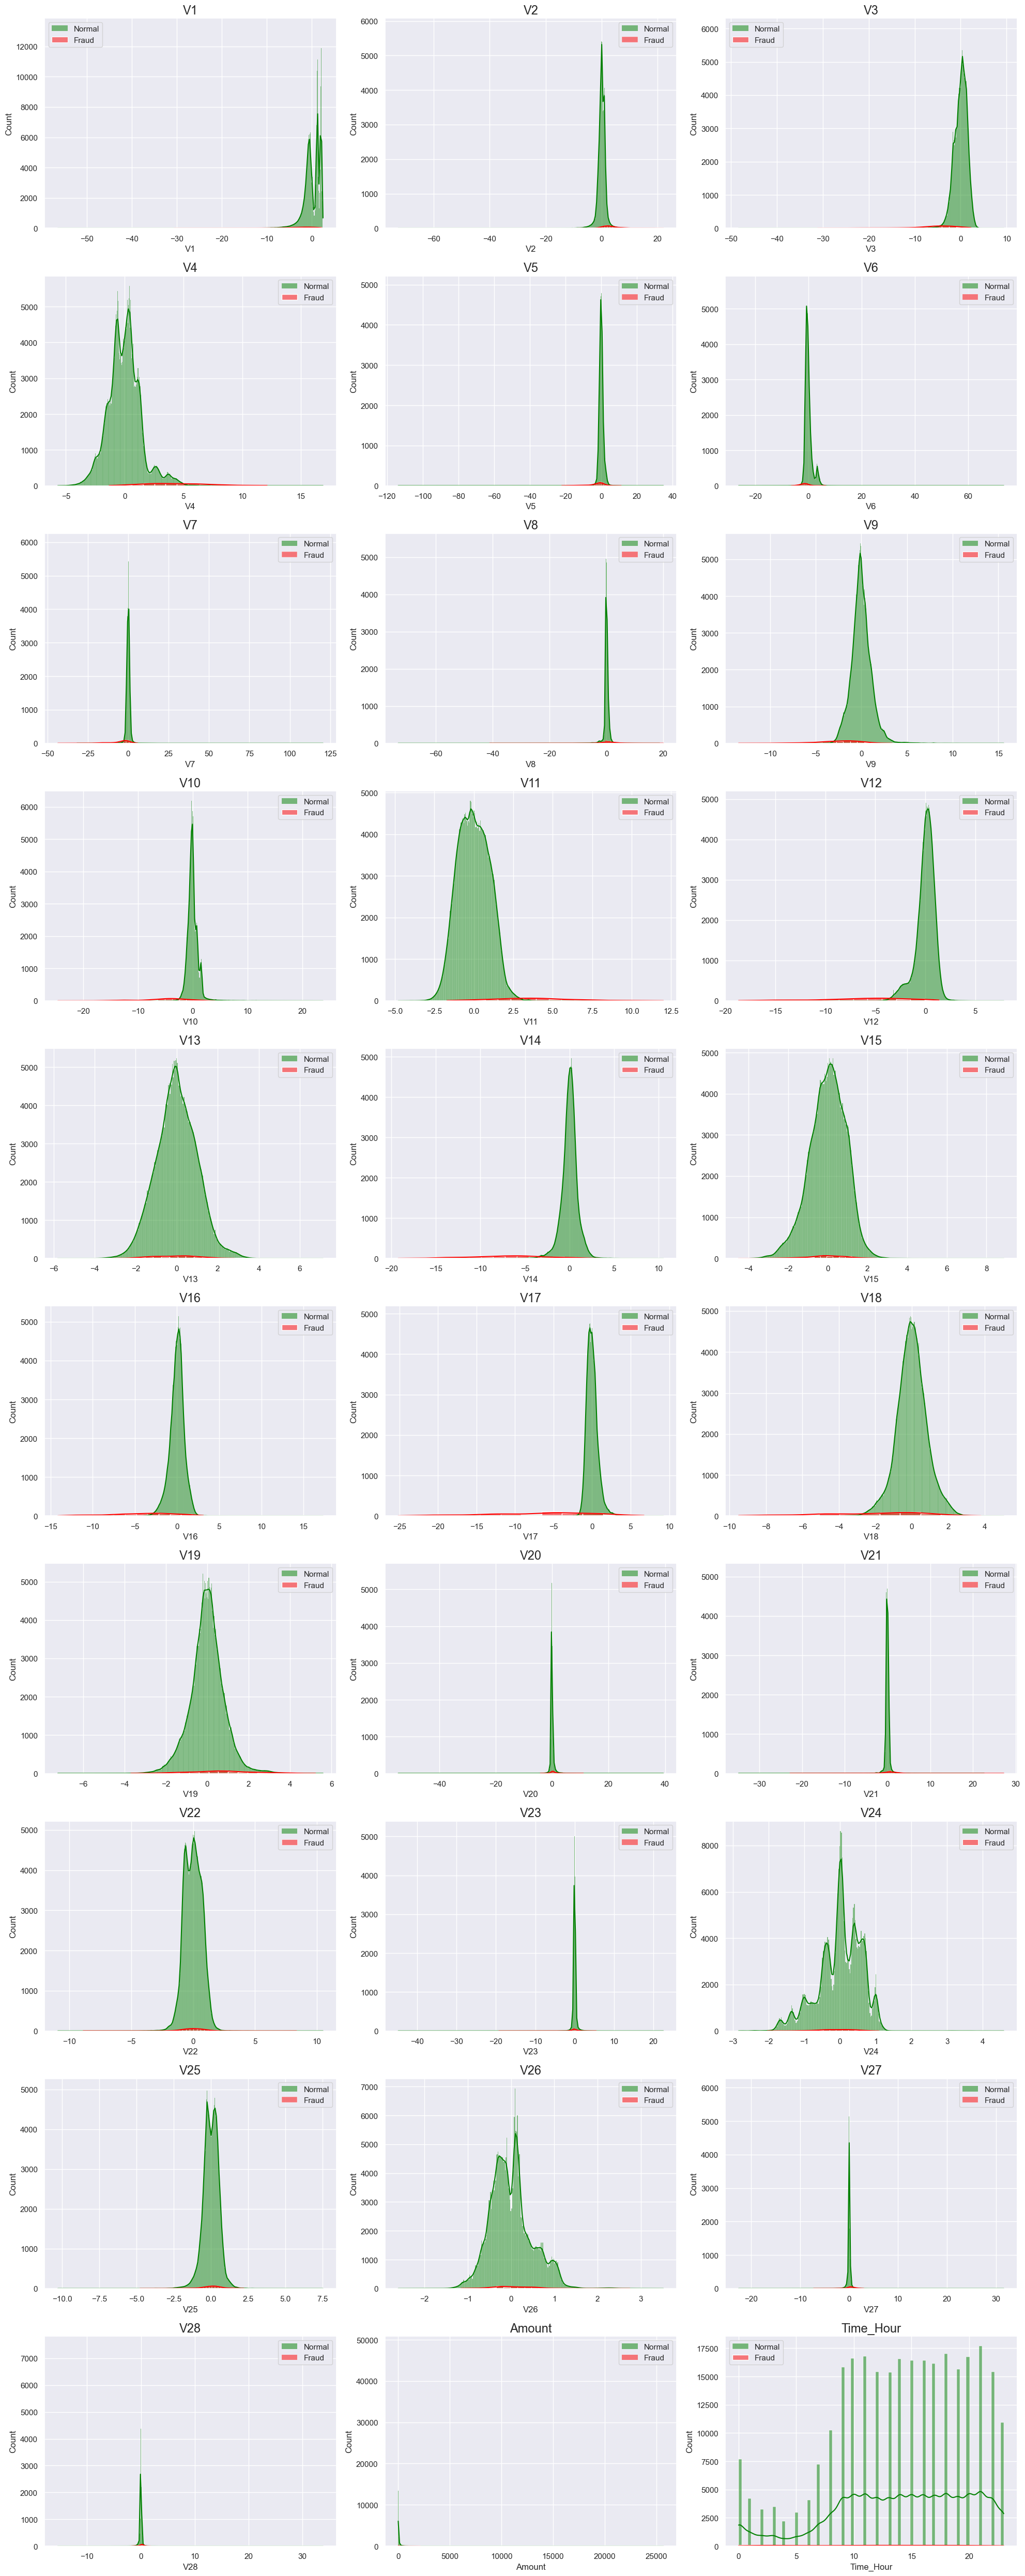

In [38]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(20,50))
for n, col in enumerate(cols):
    plt.subplot(10, 3, n+1)
    #Plot normal records in green
    sns.histplot(X[cols][normal_records][col], color='green', kde=True, label='Normal', alpha=0.5)
    
    #Plot fraud records in red
    sns.histplot(X[cols][fraud_records][col], color='red', kde=True, label='Fraud', alpha=0.5)
    
    plt.title(col, fontsize=17)
    plt.legend()

plt.tight_layout()
plt.show()

# Model Creation

In [39]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])
print(type(df_Results))

<class 'pandas.core.frame.DataFrame'>


In [40]:
def Plot_confusion_matrix(y_test, pred_test):
    
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    classNames = ['Non-Fraudalent','Fraudalent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
  
    for i in range(2):
        
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [41]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

    # Logistic Regression
    from sklearn import linear_model #import the package
    from sklearn.model_selection import KFold

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)
 
    searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

    searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
    #searchCV.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)
    print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
    print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_) 
    print(searchCV_l2.scores_) 

    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_) 
    print(searchCV_l1.scores_) 
 

  #find predicted vallues
    y_pred_l2 = searchCV_l2.predict(X_test)
    y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("classification Report")
    print(classification_report(y_test, y_pred_l2))
    print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("classification Report")
    print(classification_report(y_test, y_pred_l1))

    from sklearn.metrics import roc_auc_score
    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}" .format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0])], ignore_index=True)

    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}" .format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0])], ignore_index=True)
    return df_Results


In [42]:
import time
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.utils import check_array

def buildAndRunKNNModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    # Convert data to C-contiguous NumPy arrays
    X_train_array = check_array(X_train, ensure_2d=True, dtype=None, order='C')
    y_train_array = check_array(y_train, ensure_2d=False, dtype=None, order='C')
    X_test_array = check_array(X_test, ensure_2d=True, dtype=None, order='C')
    y_test_array = check_array(y_test, ensure_2d=False, dtype=None, order='C')
    
    # Create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train_array, y_train_array)
    
    # Calculate and print model score
    score = knn.score(X_test_array, y_test_array)
    print("Model score:", score)
    
    # Predict and evaluate the model
    y_pred = knn.predict(X_test_array)
    print("Confusion Matrix")
    # Assuming you have a function called Plot_confusion_matrix
    Plot_confusion_matrix(y_test_array, y_pred)
    print("Classification Report")
    print(classification_report(y_test_array, y_pred))
    
    knn_probs = knn.predict_proba(X_test_array)[:, 1]
    knn_roc_value = roc_auc_score(y_test_array, knn_probs)
    print("KNN roc_value:", knn_roc_value)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))
    
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN MODEL','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0])], ignore_index=True)
    return df_Results




In [43]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
    #Evaluate Decision Tree model with 'gini' & 'entropy'
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score
    criteria = ['gini', 'entropy'] 
    scores = {} 
    
    for c in criteria: 
        
        dt = DecisionTreeClassifier(criterion = c, random_state=42) 
        dt.fit(X_train, y_train) 
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test) 
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score 
        print(c + " score: {0}" .format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("classification Report")
        print(classification_report(y_test, y_pred))
        print(c + " tree_roc_value: {0}" .format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
        plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
  
        
        df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'TREE MODEL','Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0])], ignore_index=True)
    return df_Results

In [44]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import roc_auc_score

    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)

    print('Model Accuracy: {0}'.format(RF_test_score))


    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("classification Report")
    print(classification_report(y_test, rf_predictions))
  
    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)

    print("Random Forest roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
  
    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0])], ignore_index=True)
    
    return df_Results


In [45]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
    #Evaluate XGboost model
    from xgboost import XGBClassifier
    from sklearn.metrics import roc_auc_score
    # fit model no training data
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
  
    print("XGboost roc_value: {0}" .format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy':  XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0])], ignore_index=True)
    return df_Results

In [46]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
    
     
     #Evaluate SVM model with sigmoid kernel  model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train,y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test,y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_Score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("classification Report")
    print(classification_report(y_test, y_pred_SVM))



  # Run classifier
    classifier = SVC(kernel='sigmoid' , probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
 
  # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
  
    print("SVM roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy':  SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0])], ignore_index=True)
    return df_Results

In [47]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       
X_train_pt = pt.transform(X_train)   
X_test_pt = pt.transform(X_test)

In [48]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

In [49]:
print(type(df_Results))

<class 'pandas.core.frame.DataFrame'>


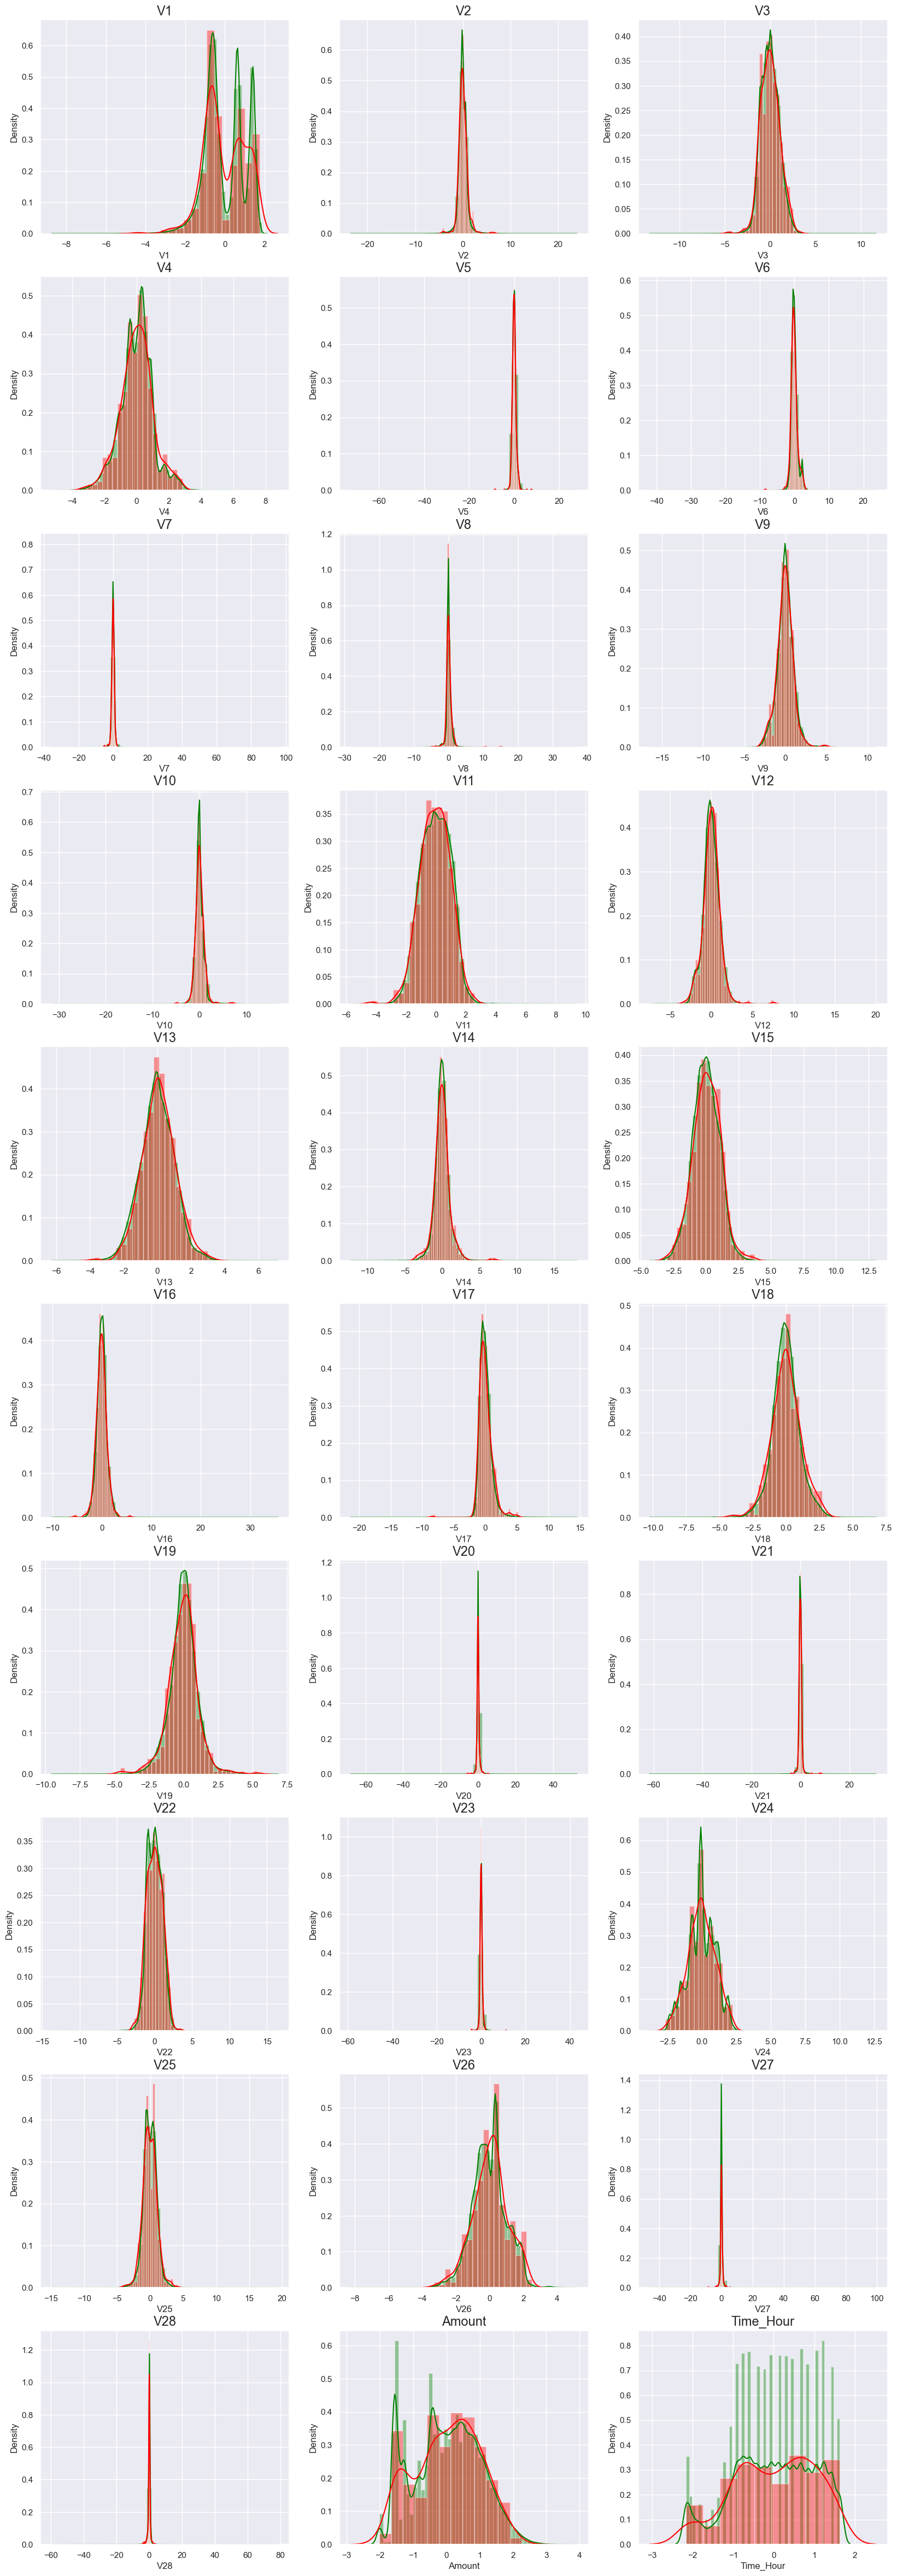

In [67]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    
    plt.subplot(10,3,n+1)
    sns.distplot(X_train_pt_df[col][normal_records], color='green')
    sns.distplot(X_train_pt_df[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

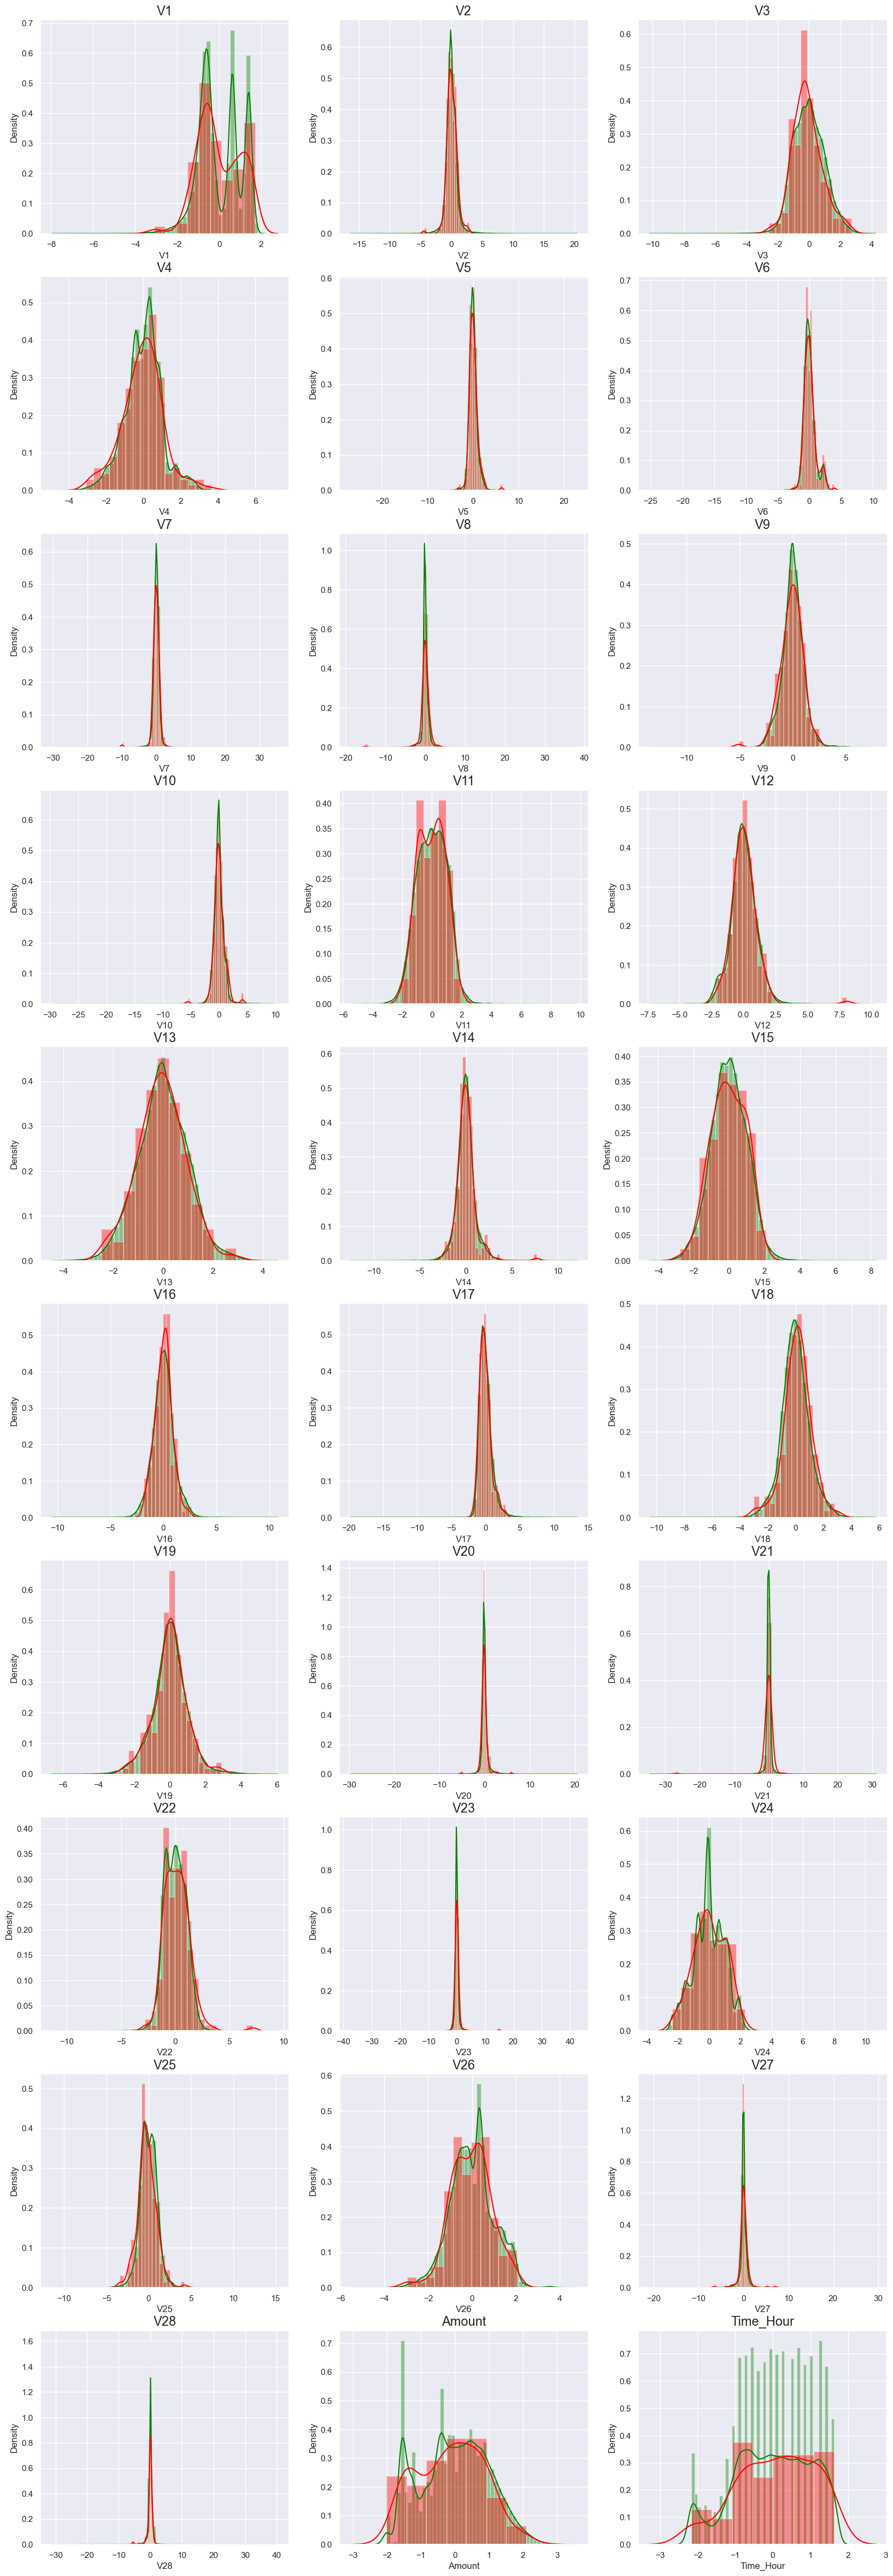

In [68]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X_test_pt_df[col][normal_records], color='green')
    sns.distplot(X_test_pt_df[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

# Build different models on the imbalanced dataset and see the result

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5
Max auc_roc for l1: 0.985410899045824
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

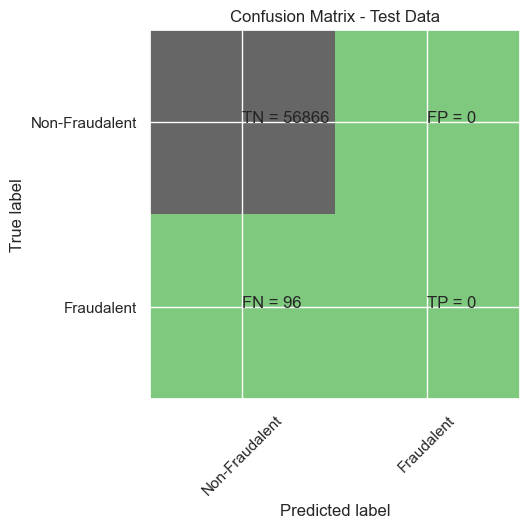

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


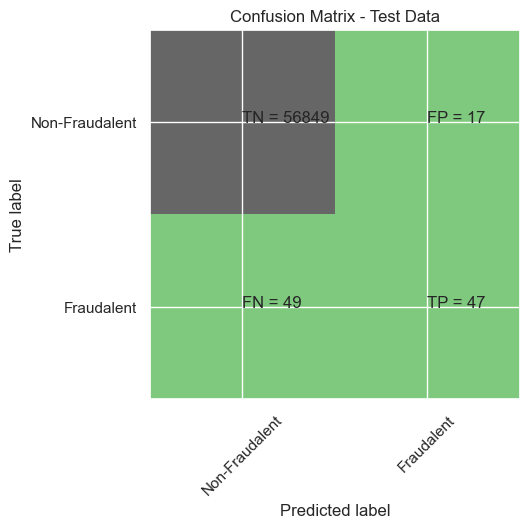

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


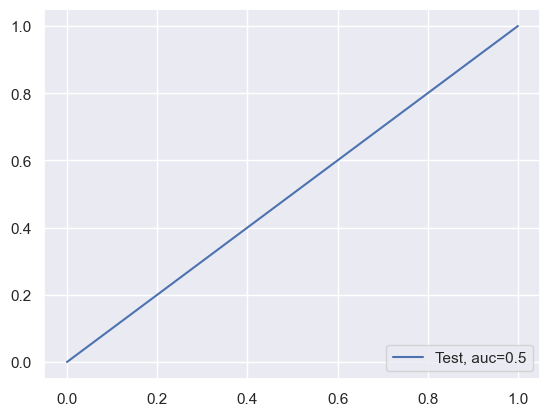

l1 roc_value: 0.9639030791685718
l1 threshold: 0.00927649384990859
ROC for the test dataset 96.4%


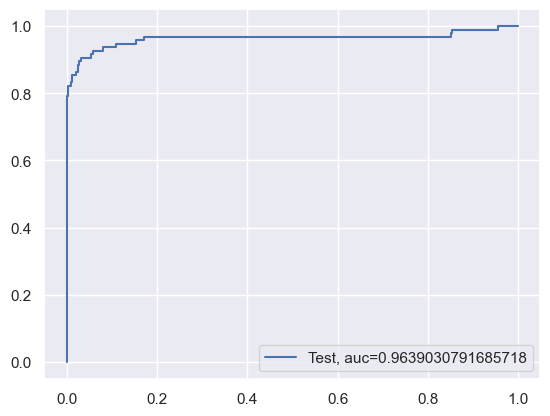

Time Taken by Model: --- 72.73137521743774 seconds ---
--------------------------------------------------------------------------------


In [50]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
Model score: 0.9992977774656788
Confusion Matrix


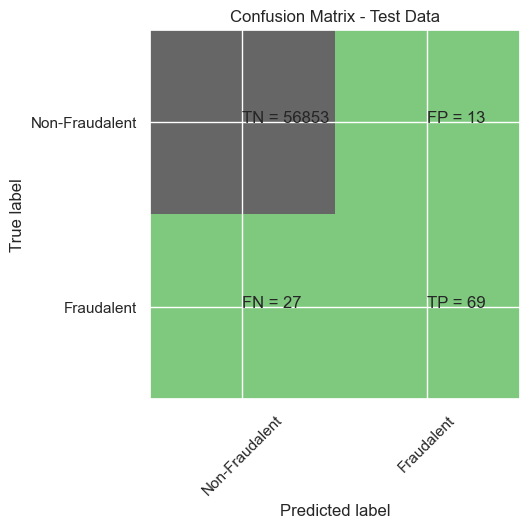

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


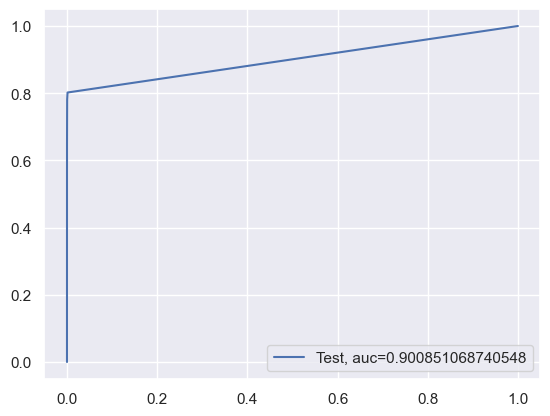

Time Taken by Model: --- 111.62048172950745 seconds ---
--------------------------------------------------------------------------------


In [51]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


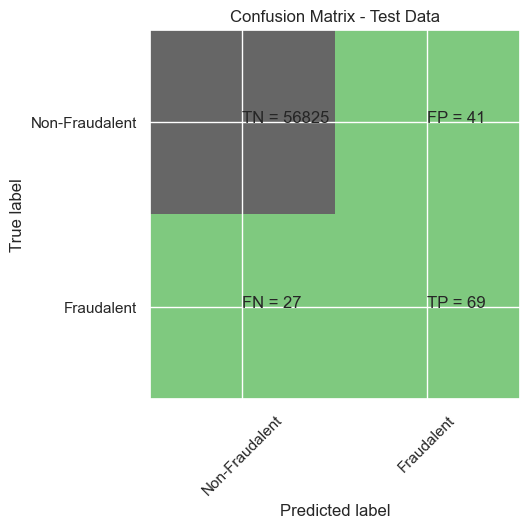

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


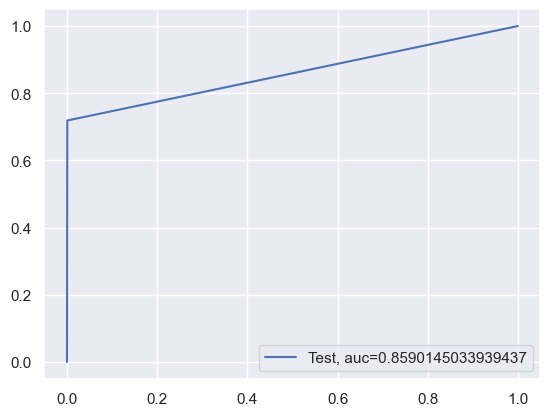

entropy score: 0.9990519995786665
Confusion Matrix


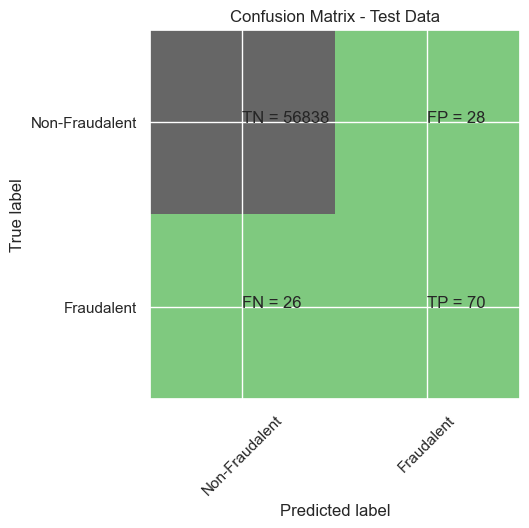

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


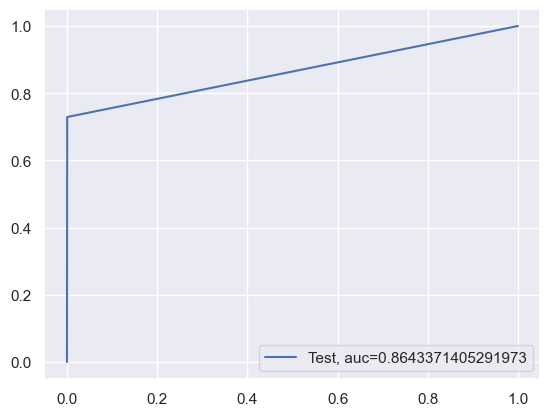

Time Taken by Model: --- 33.8472695350647 seconds ---
--------------------------------------------------------------------------------


In [53]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


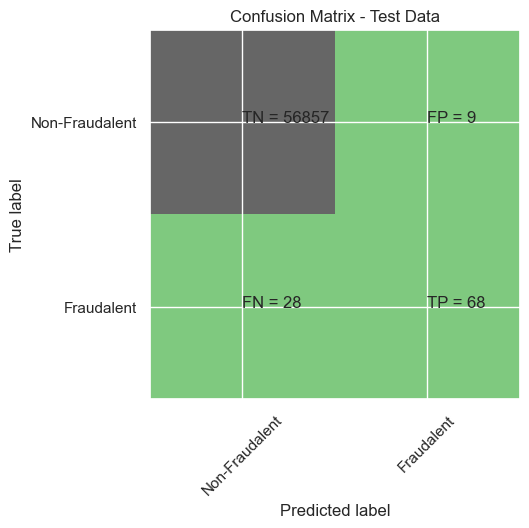

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


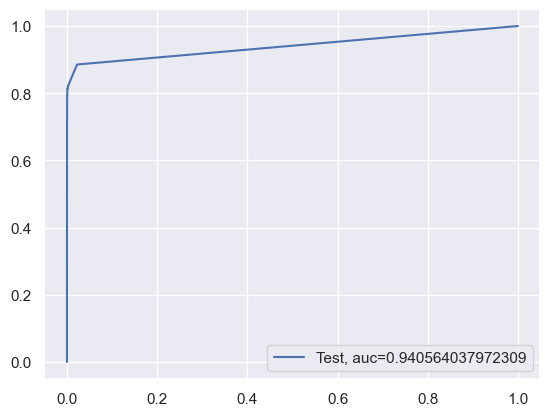

Time Taken by Model: --- 229.09967041015625 seconds ---
--------------------------------------------------------------------------------


In [54]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.999385555282469
Confusion Matrix


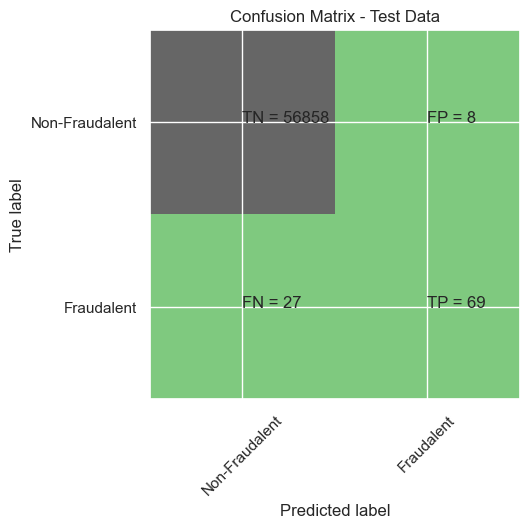

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.72      0.80        96

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9775861967901147
XGBoost threshold: 2.300571941304952e-05
ROC for the test dataset 97.8%


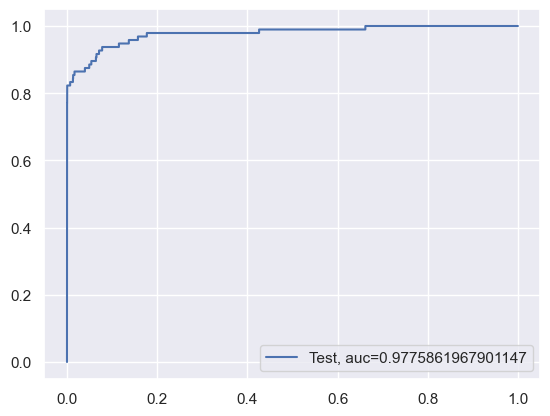

Time Taken by Model: --- 2.6730496883392334 seconds ---
--------------------------------------------------------------------------------


In [55]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


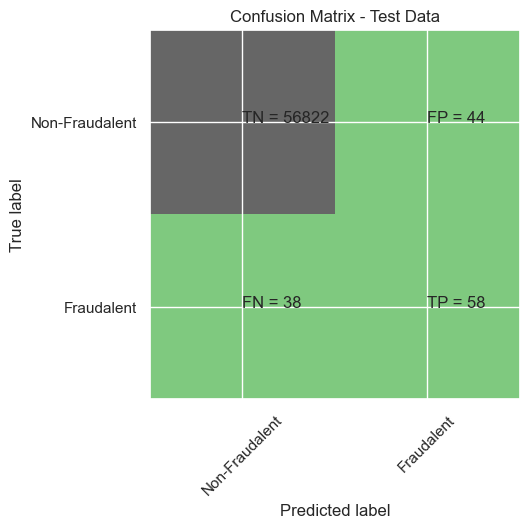

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913232789950645
SVM threshold: 0.0006630638253884954
ROC for the test dataset 89.1%


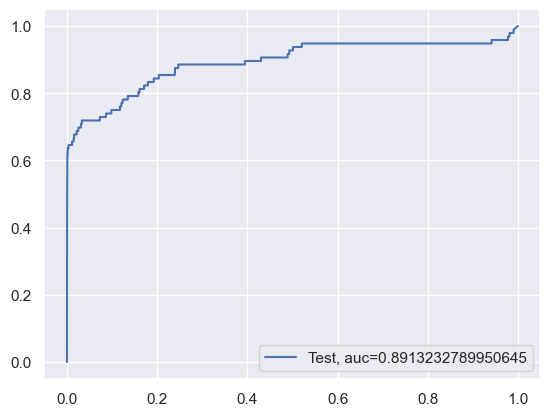

Time Taken by Model: --- 72.17510318756104 seconds ---
--------------------------------------------------------------------------------


In [56]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [57]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0        Power Transformer  Logistic Regression with L2 Regularisation   
1        Power Transformer  Logistic Regression with L1 Regularisation   
2        Power Transformer                                   KNN MODEL   
3        Power Transformer                                  TREE MODEL   
4        Power Transformer                                  TREE MODEL   
5        Power Transformer                               Random Forest   
6        Power Transformer                                     XGBoost   
7        Power Transformer                                         SVM   

   Accuracy  roc_value  threshold  
0  0.998315   0.500000        inf  
1  0.998841   0.963903   0.009276  
2  0.999298   0.900851   0.200000  
3  0.998806   0.859015   1.000000  
4  0.999052   0.864337   1.000000  
5  0.999350   0.940564   0.010000  
6  0.999386   0.977586   0.000023  
7  0.998560   0.891323   0.000663

# Perform cross validation with RepeatedKFold

In [58]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0     12     16 ... 284785 284786 284793]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     4      7     19 ... 284799 284802 284804]
TRAIN: [     0      1      3 ... 284801 284802 284804] TEST: [     2      9     11 ... 284803 284805 284806]
TRAIN: [     0      2      4 ... 284804 284805 284806] TEST: [     1      3      8 ... 284794 284795 284796]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5      6     10 ... 284775 284782 284801]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     6     20     21 ... 284796 284800 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3     14     30 ... 284797 284798 284802]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      5      7 ... 284793 284801 284803]
TRAIN: [     2      3      4 ... 284803 284804 284806] TEST: [     0      1      8 ... 284780 284782 284805]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5
Max auc_roc for l1: 0.985410899045824
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

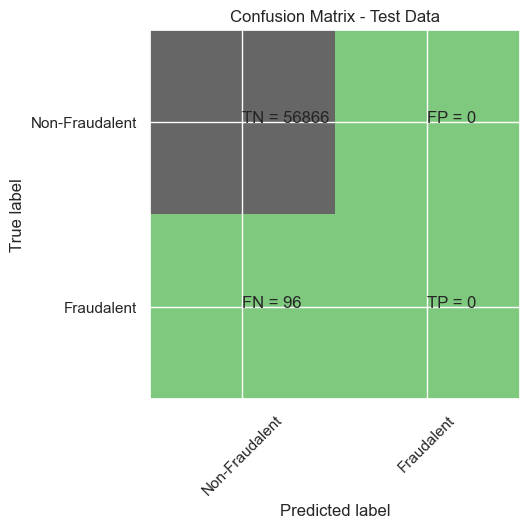

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


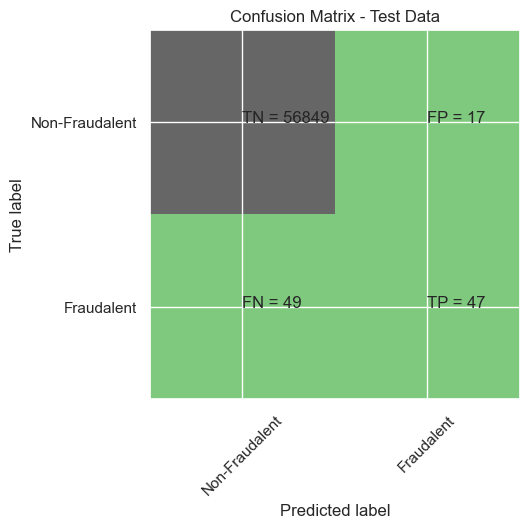

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


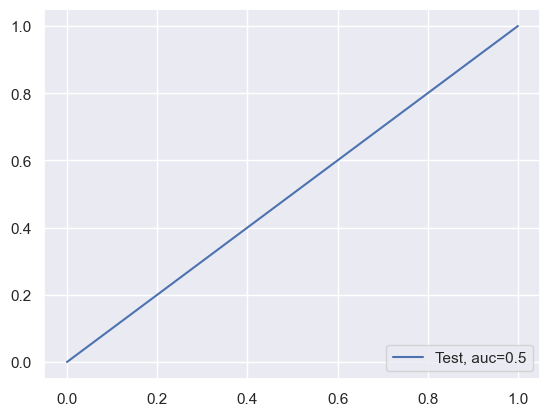

l1 roc_value: 0.9639030791685718
l1 threshold: 0.00927649384990859
ROC for the test dataset 96.4%


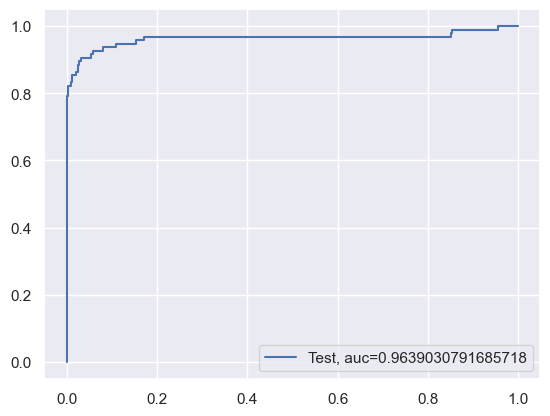

Time Taken by Model: --- 71.31908965110779 seconds ---
--------------------------------------------------------------------------------


In [59]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
Model score: 0.9992275416513052
Confusion Matrix


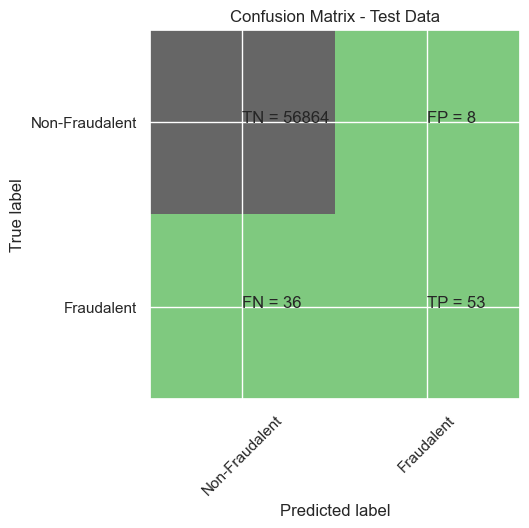

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.87      0.60      0.71        89

    accuracy                           1.00     56961
   macro avg       0.93      0.80      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.870543214725439
KNN threshold: 0.2
ROC for the test dataset 87.1%


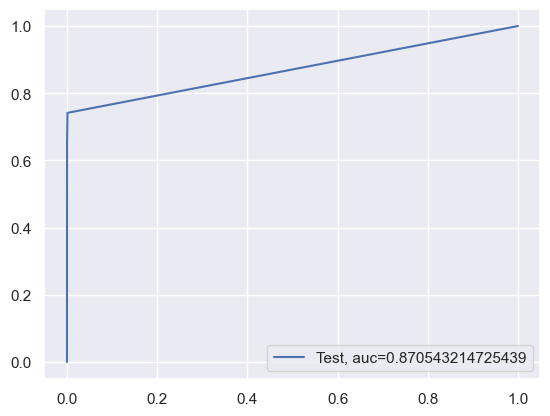

Time Taken by Model: --- 111.11469793319702 seconds ---
--------------------------------------------------------------------------------


In [60]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989993153210092
Confusion Matrix


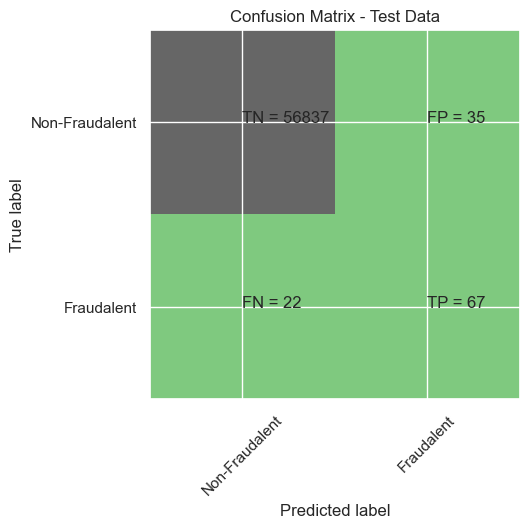

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.66      0.75      0.70        89

    accuracy                           1.00     56961
   macro avg       0.83      0.88      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.87609678584355
Tree threshold: 1.0
ROC for the test dataset 87.6%


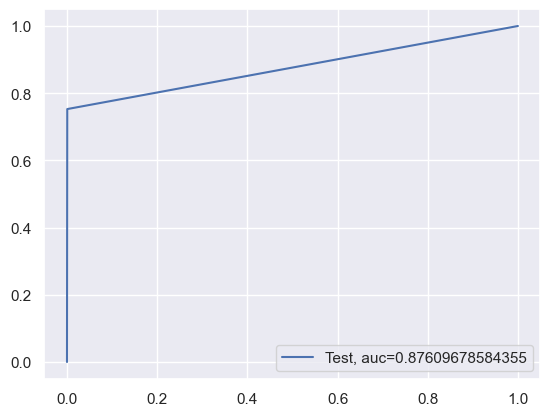

entropy score: 0.9991748740366215
Confusion Matrix


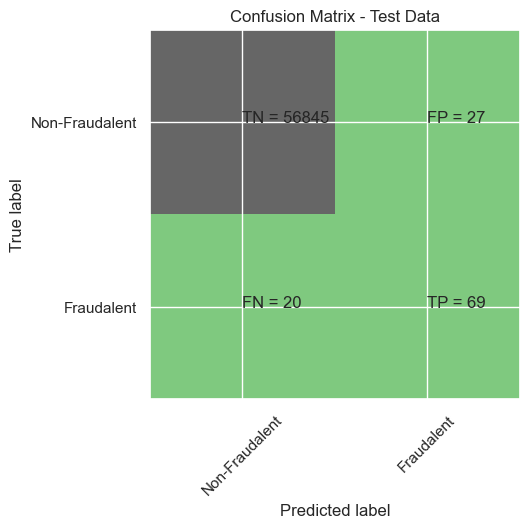

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.72      0.78      0.75        89

    accuracy                           1.00     56961
   macro avg       0.86      0.89      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.887403074279952
Tree threshold: 1.0
ROC for the test dataset 88.7%


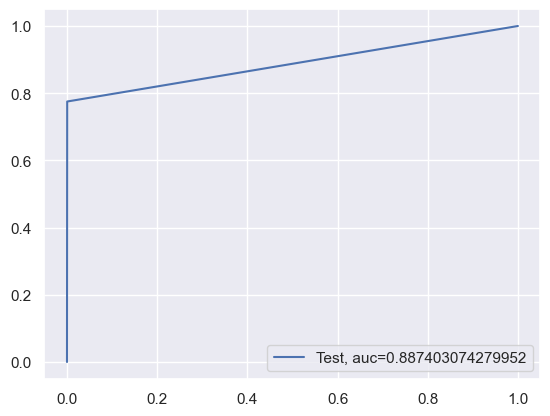

Time Taken by Model: --- 38.434487104415894 seconds ---
--------------------------------------------------------------------------------


In [62]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9995435473394076
Confusion Matrix


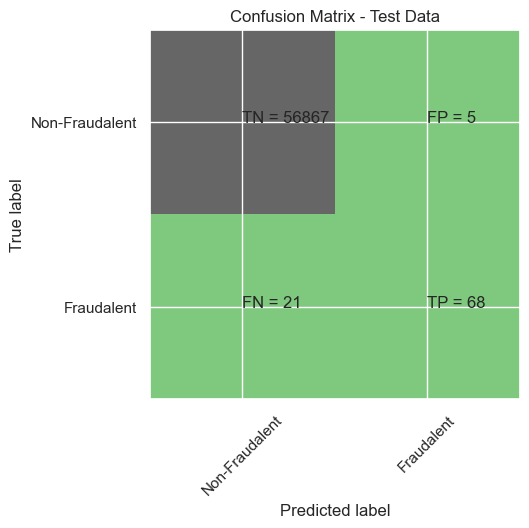

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.93      0.76      0.84        89

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9479708819805881
Random Forest threshold: 0.02
ROC for the test dataset 94.8%


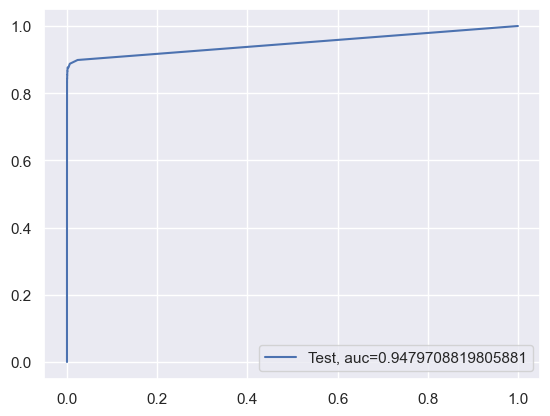

Time Taken by Model: --- 258.39316415786743 seconds ---
--------------------------------------------------------------------------------


In [63]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9995611032109689
Confusion Matrix


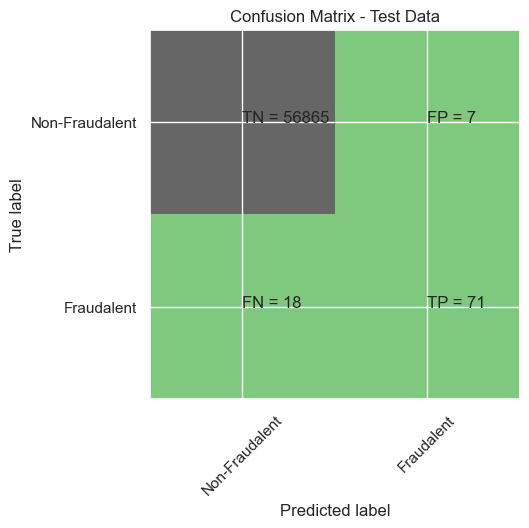

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.91      0.80      0.85        89

    accuracy                           1.00     56961
   macro avg       0.95      0.90      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9728416345161458
XGBoost threshold: 0.00011064323916798458
ROC for the test dataset 97.3%


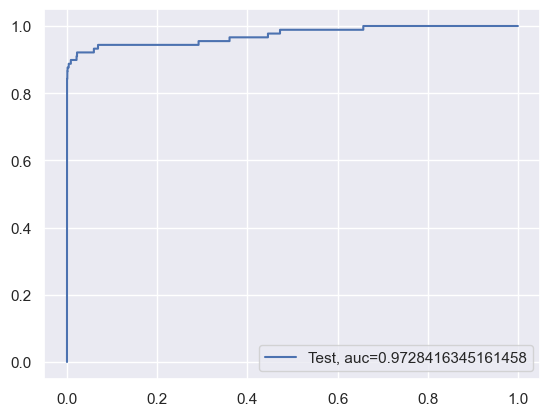

Time Taken by Model: --- 2.6743836402893066 seconds ---
--------------------------------------------------------------------------------


In [64]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

SVM Model with Sigmoid Kernel
accuracy_score : 0.9984550833026106
Confusion Matrix


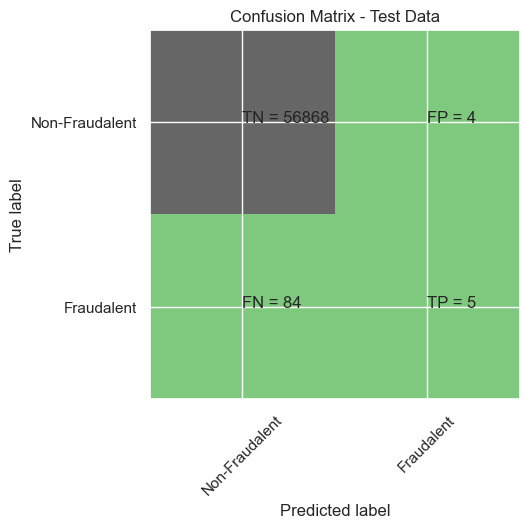

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.56      0.06      0.10        89

    accuracy                           1.00     56961
   macro avg       0.78      0.53      0.55     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.468828482964307
SVM threshold: 0.0018394094101356227
ROC for the test dataset 46.9%


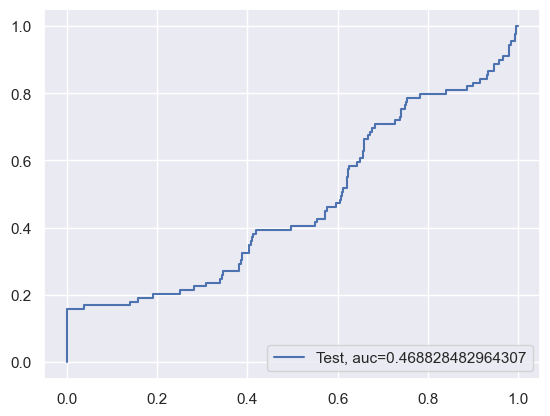

Time Taken by Model: --- 418.46397638320923 seconds ---


In [65]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [66]:
df_Results

Data_Imbalance_Handiling  \
0                Power Transformer   
1                Power Transformer   
2                Power Transformer   
3                Power Transformer   
4                Power Transformer   
5                Power Transformer   
6                Power Transformer   
7                Power Transformer   
8                Power Transformer   
9                Power Transformer   
10  RepeatedKFold Cross Validation   
11  RepeatedKFold Cross Validation   
12  RepeatedKFold Cross Validation   
13  RepeatedKFold Cross Validation   
14  RepeatedKFold Cross Validation   
15  RepeatedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998315   0.500000        inf  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                    KNN MODEL  0.999298   0.900851   0.200000  
3                                   TREE MODEL  0.998806   0.859015   1.000000  
4                                   TREE MODEL  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999386   0.977586   0.000023  
7                                          SVM  0.998560   0.891323   0.000663  
8   Logistic Regression with L2 Regularisation  0.998315   0.500000        inf  
9   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
10                                   KNN MODEL  0.999228   0.870543   0.200000  
11                                  TREE MODEL  0.998999   0.876097   1.000000  
12                                  TREE MODEL  0.999175   0.887403   1.000000  
13                               Random Forest  0.999544   0.947971   0.020000  
14                                     XGBoost  0.999561   0.972842   0.000111  
15                                         SVM  0.998455   0.468828   0.001839

# It seems that XGBOost with Repeated KFold cross validation has provided us with best results with ROC_Value of 0.967803 and Accuracy of 0.999456

In [69]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

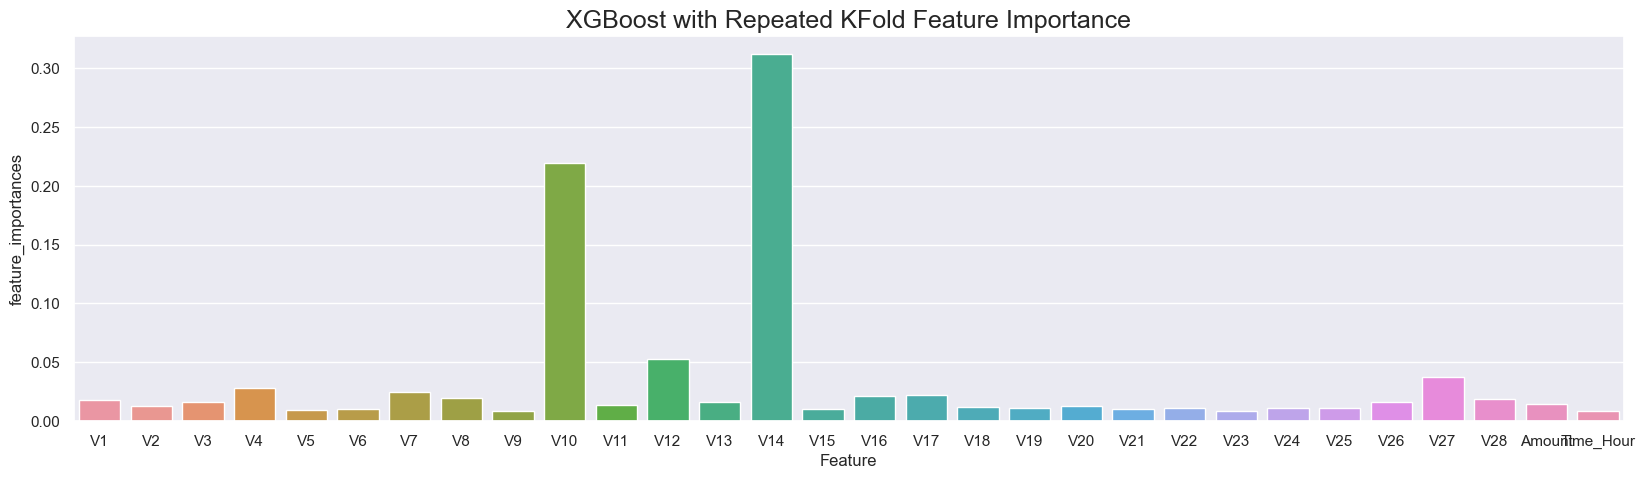

In [70]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

# Perform cross validation with stratified k fold

In [71]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5597020083683936
Max auc_roc for l1: 0.9652106893977332
Parameters for l2 regularisations
[[ 3.59840980e-07  2.10530060e-07 -1.58002317e-06 -2.04884044e-07
   3.76472678e-07 -2.67633109e-07  3.13241030e-08 -1.20226136e-08
  -8.98863463e-08 -1.54002314e-07 -4.65334035e-07  1.57441535e-07
  -1.27094538e-07 -4.38050832e-07 -3.73274685e-07 -8.23337714e-08
  -3.16607926e-07  1.01807717e-07  7.54814354e-08 -6.47175864e-08
   7.04219521e-08  1.73013268e-07  7.32726162e-08 -1.03599764e-08
  -2.85545640e-07 -2.03747293e-08  3.38203552e-09 -1.32510706e-08
  -6.82254904e-04 -9.57433590e-05]]
[-7.52178855e-06]
{1: array([[0.48266925, 0.48178322, 0.47951852, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818],
       [0.55602862, 0.55598183, 0.55533056, 0

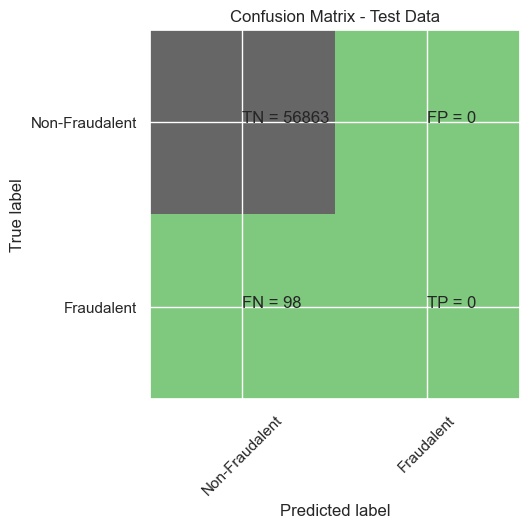

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9987535331191517
Confusion Matrix


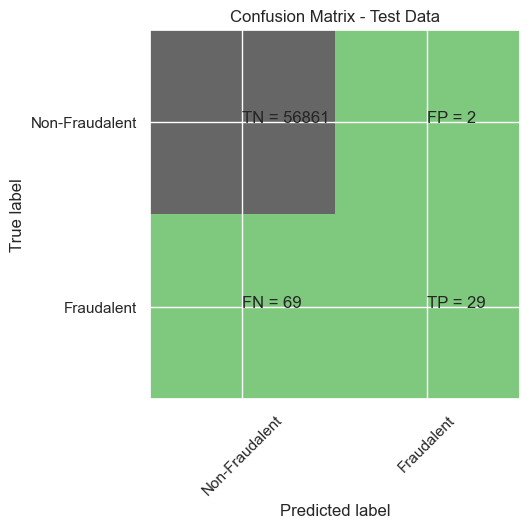

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.6111619154810686
l2 threshold: 0.499392195772867
ROC for the test dataset 61.1%


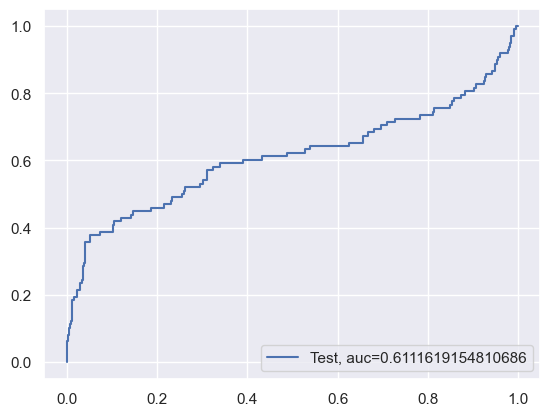

l1 roc_value: 0.8890758561483437
l1 threshold: 0.02108749276779219
ROC for the test dataset 88.9%


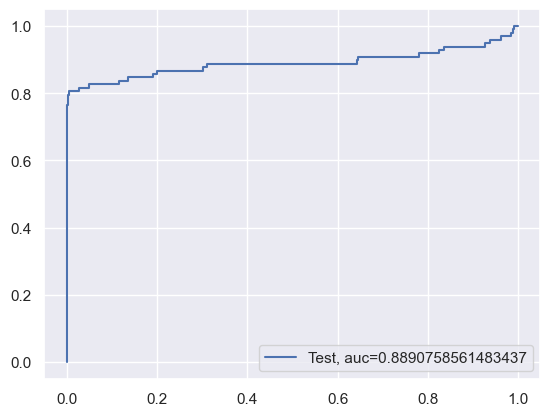

Time Taken by Model: --- 74.2994954586029 seconds ---
--------------------------------------------------------------------------------


In [72]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold  Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
Model score: 0.9991924299081828
Confusion Matrix


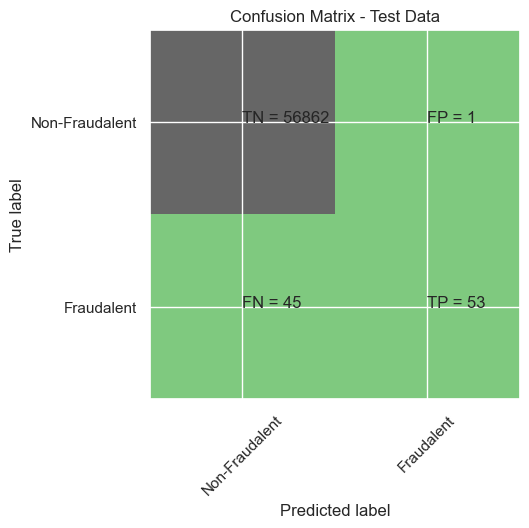

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


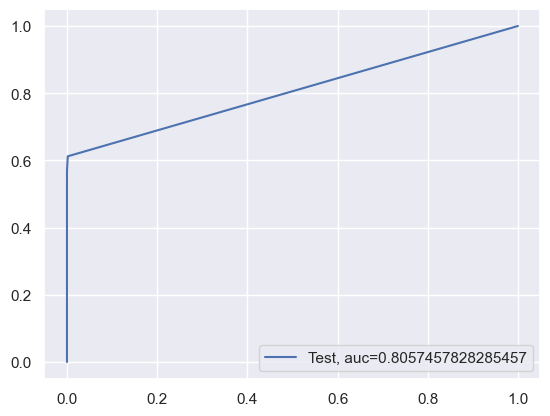

Time Taken by Model: --- 109.93086314201355 seconds ---
--------------------------------------------------------------------------------


In [73]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold  Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


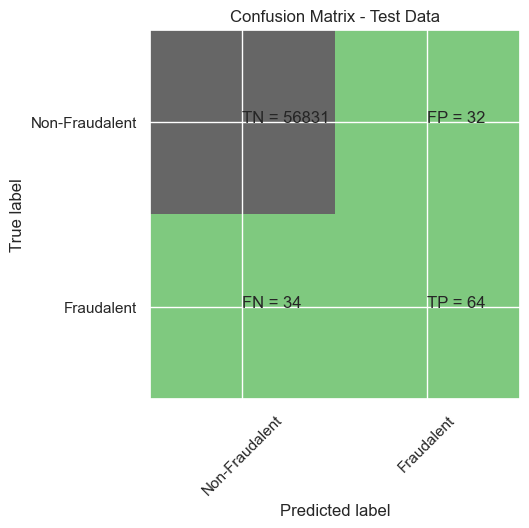

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


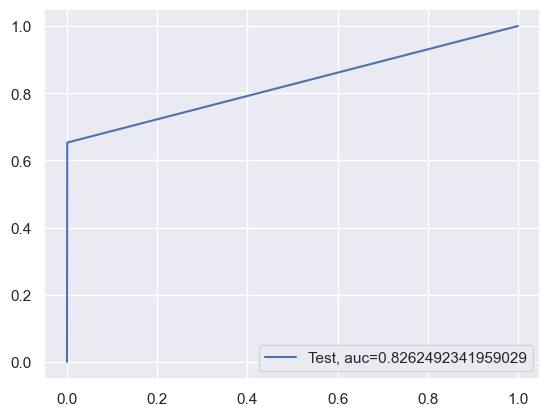

entropy score: 0.9990168711925703
Confusion Matrix


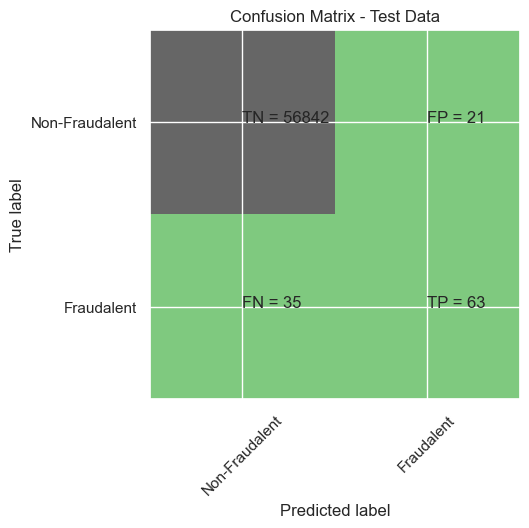

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


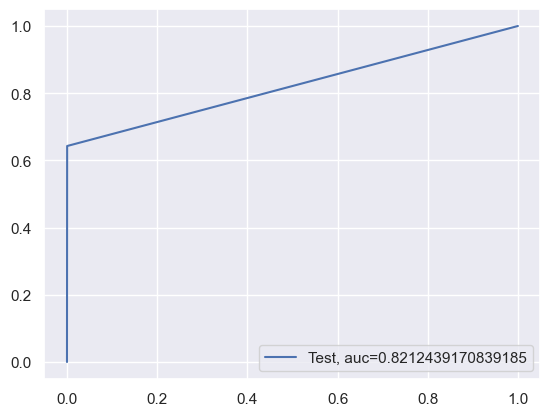

Time Taken by Model: --- 32.65474534034729 seconds ---
--------------------------------------------------------------------------------


In [74]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold  Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


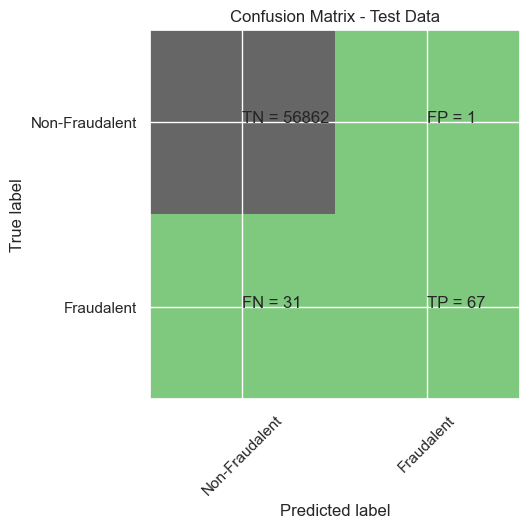

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


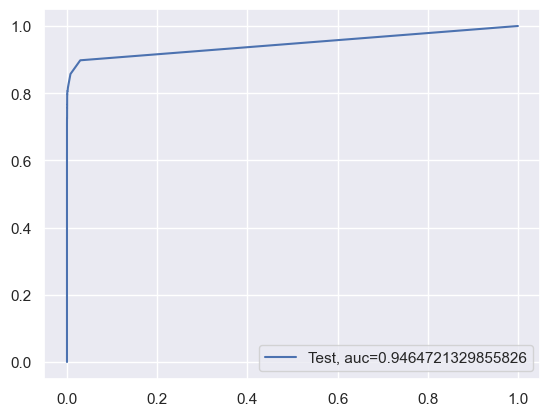

Time Taken by Model: --- 216.3591628074646 seconds ---
--------------------------------------------------------------------------------


In [75]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold  Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


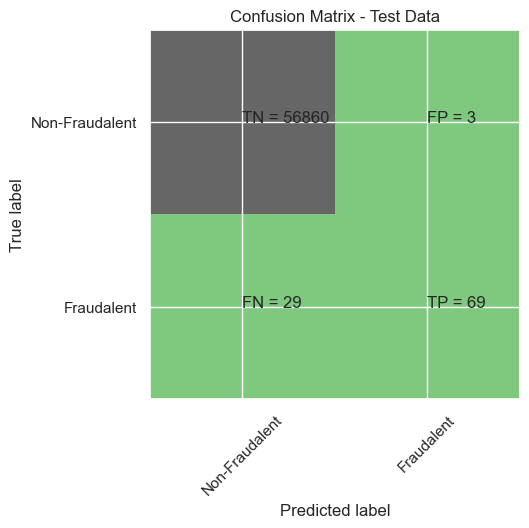

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9722049451474309
XGBoost threshold: 3.768169699469581e-05
ROC for the test dataset 97.2%


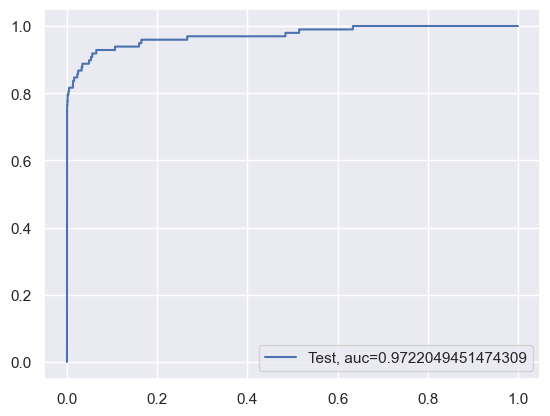

Time Taken by Model: --- 2.6193642616271973 seconds ---
--------------------------------------------------------------------------------


In [76]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold  Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


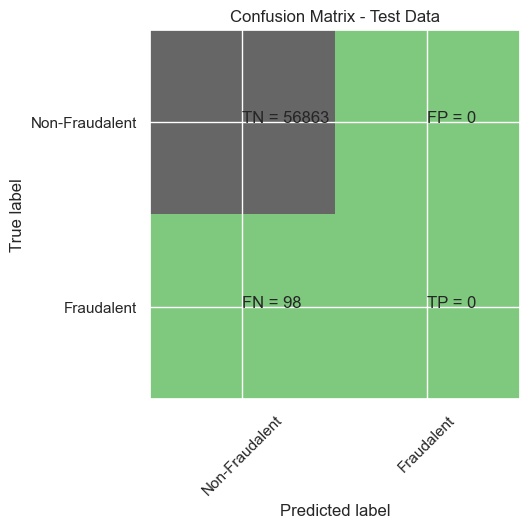

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.004357693444123233
ROC for the test dataset 40.2%


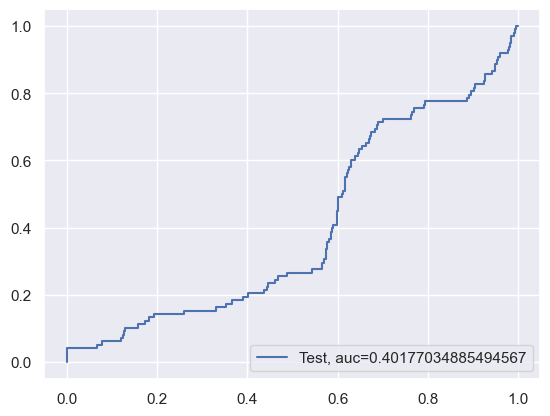

Time Taken by Model: --- 138.89535474777222 seconds ---
--------------------------------------------------------------------------------


In [77]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold  Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [78]:
df_Results

Data_Imbalance_Handiling  \
0                   Power Transformer   
1                   Power Transformer   
2                   Power Transformer   
3                   Power Transformer   
4                   Power Transformer   
5                   Power Transformer   
6                   Power Transformer   
7                   Power Transformer   
8                   Power Transformer   
9                   Power Transformer   
10     RepeatedKFold Cross Validation   
11     RepeatedKFold Cross Validation   
12     RepeatedKFold Cross Validation   
13     RepeatedKFold Cross Validation   
14     RepeatedKFold Cross Validation   
15     RepeatedKFold Cross Validation   
16  StratifiedKFold  Cross Validation   
17  StratifiedKFold  Cross Validation   
18  StratifiedKFold  Cross Validation   
19  StratifiedKFold  Cross Validation   
20  StratifiedKFold  Cross Validation   
21  StratifiedKFold  Cross Validation   
22  StratifiedKFold  Cross Validation   
23  StratifiedKFold  Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998315   0.500000        inf  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                    KNN MODEL  0.999298   0.900851   0.200000  
3                                   TREE MODEL  0.998806   0.859015   1.000000  
4                                   TREE MODEL  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999386   0.977586   0.000023  
7                                          SVM  0.998560   0.891323   0.000663  
8   Logistic Regression with L2 Regularisation  0.998315   0.500000        inf  
9   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
10                                   KNN MODEL  0.999228   0.870543   0.200000  
11                                  TREE MODEL  0.998999   0.876097   1.000000  
12                                  TREE MODEL  0.999175   0.887403   1.000000  
13                               Random Forest  0.999544   0.947971   0.020000  
14                                     XGBoost  0.999561   0.972842   0.000111  
15                                         SVM  0.998455   0.468828   0.001839  
16  Logistic Regression with L2 Regularisation  0.998280   0.611162   0.499392  
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
18                                   KNN MODEL  0.999192   0.805746   0.200000  
19                                  TREE MODEL  0.998841   0.826249   1.000000  
20                                  TREE MODEL  0.999017   0.821244   1.000000  
21                               Random Forest  0.999438   0.946472   0.010000  
22                                     XGBoost  0.999438   0.972205   0.000038  
23                                         SVM  0.998280   0.401770   0.004358

# It seems that XGBOost with Repeated KFold cross validation has provided us with best results with ROC_Value of 0.972205 and Accuracy of 0.999438

Proceed with the model which shows the best result

Apply the best hyperparameter on the model

Predict on the test dataset

In [79]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define the parameter distributions
param_distributions = {
    'eta': np.linspace(0.01, 0.1, 5),
    'max_depth': np.arange(3, 6),
    'subsample': np.linspace(0.7, 0.9, 3),
    'colsample_bytree': np.linspace(0.7, 0.9, 3),
    'objective': ['binary:logistic'],
    'eval_metric': ['auc'],
    'n_estimators': [50, 100]
}

skf = StratifiedKFold(n_splits=5, random_state=None)

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier()

# Randomized search
random_search = RandomizedSearchCV(estimator=xgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=50,
                                   scoring='roc_auc',
                                   cv=skf,
                                   n_jobs=-1,
                                   verbose=1)

# Fit the model
random_search.fit(X_train_SKF_cv, y_train_SKF_cv)

# Best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Predictions
y_pred = random_search.predict(X_test_SKF_cv)
y_pred_probs = random_search.predict_proba(X_test_SKF_cv)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test_SKF_cv, y_pred)
print("Accuracy of XGBoost model:", accuracy)

# ROC AUC
roc_value = roc_auc_score(y_test_SKF_cv, y_pred_probs)
print("ROC AUC value:", roc_value)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_SKF_cv, y_pred_probs)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("Optimal threshold:", optimal_threshold)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.8, 'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 3, 'eval_metric': 'auc', 'eta': 0.1, 'colsample_bytree': 0.7}
Accuracy of XGBoost model: 0.9993679886237953
ROC AUC value: 0.9799865376395182
Optimal threshold: 0.0020429436


In [80]:
# Get feature importances from the best estimator
importance = random_search.best_estimator_.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train_SKF_cv.columns,
    'Importance': importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(feature_importance_df)

      Feature  Importance
0         V14    0.276727
1         V10    0.180210
2          V7    0.098069
3         V17    0.052455
4         V12    0.050556
5         V16    0.042026
6          V6    0.028265
7          V4    0.027138
8         V28    0.024343
9         V26    0.022351
10        V27    0.021323
11         V1    0.018272
12        V22    0.017524
13     Amount    0.016529
14         V8    0.013844
15        V11    0.013263
16        V21    0.013235
17        V15    0.012919
18         V5    0.012899
19        V20    0.012892
20  Time_Hour    0.012409
21        V25    0.012255
22        V19    0.011095
23        V23    0.006476
24         V2    0.002924
25        V24    0.000000
26        V18    0.000000
27         V9    0.000000
28         V3    0.000000
29        V13    0.000000


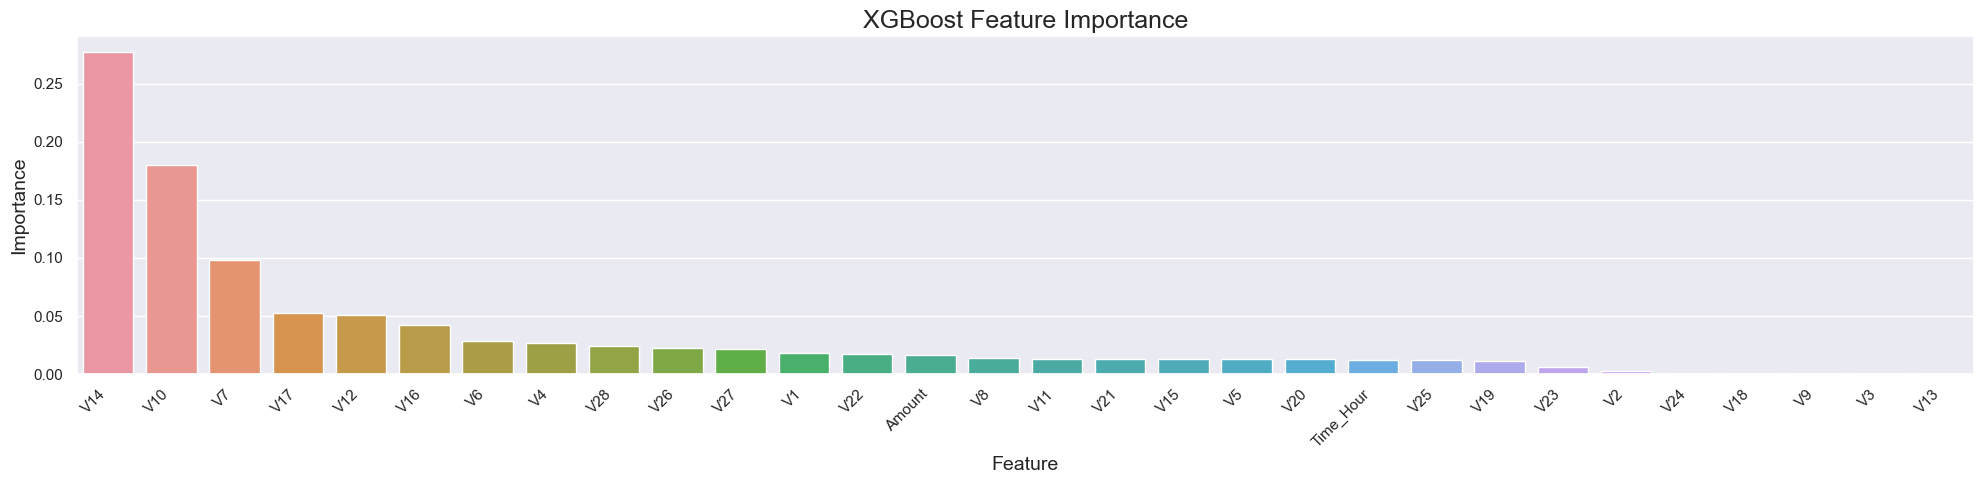

In [81]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df)
plt.title("XGBoost Feature Importance", fontsize=18)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [82]:
pip install --upgrade scikit-learn imbalanced-learn

# Model Building with  Balancing Classes 
Perofrm class Balancing with 

Random Over Sampleling

SMOTE

ADASYN


# Oversampling with RandomOverSampler and StratifiedKFold Cross Validation


# We will use Random Oversampling method to handle the class imbalance

First we will display class distibution with and without the Random Oversampling.

Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:

Logistic Regression with L2 Regularisation

Logistic Regression with L1 Regularisation

KNN

Decision tree model with Gini criteria

Decision tree model with Entropy criteria

Random Forest

XGBoost

We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique

In [83]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over = ROS.fit_resample(X_train, y_train)
  
    # Create DataFrame for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5090737752999747
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-1.88468205e-06  1.44530458e-06 -2.77507522e-06  1.60678436e-06
  -1.34348701e-06 -5.05585819e-07 -2.23562415e-06  2.33103364e-07
  -9.50495833e-07 -2.17535338e-06  1.37839666e-06 -2.34500399e-06
  -1.99731026e-08 -2.49080601e-06 -6.32006763e-08 -1.61212093e-06
  -2.65378107e-06 -9.11008944e-07  2.73727015e-07  1.28692033e-07
   2.78566848e-07  9.53970633e-09 -1.28062742e-08 -2.48587027e-08
  -3.73139892e-09  1.17542794e-08  6.55787488e-08  2.01608200e-08
  -2.07315406e-05 -5.28973485e-06]]
[-3.45933561e-07]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5 

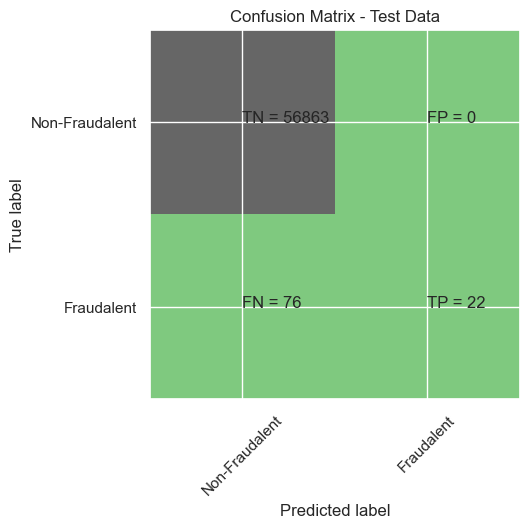

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.22      0.37        98

    accuracy                           1.00     56961
   macro avg       1.00      0.61      0.68     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


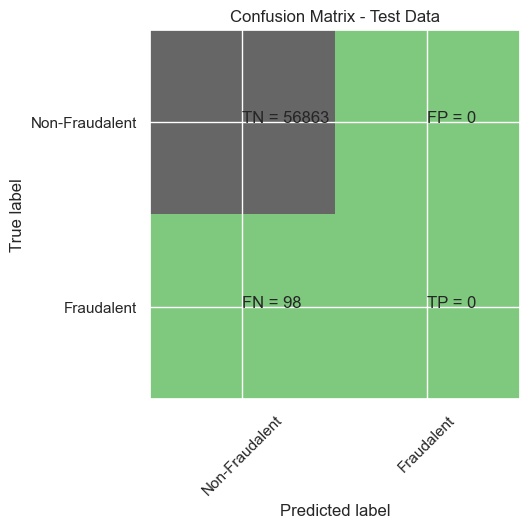

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.6430739188030523
l2 threshold: 0.4999751018789551
ROC for the test dataset 64.3%


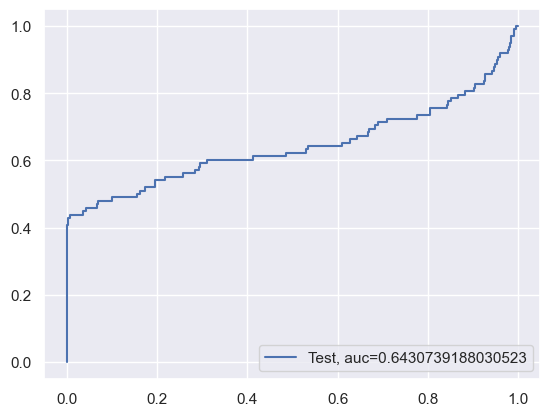

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


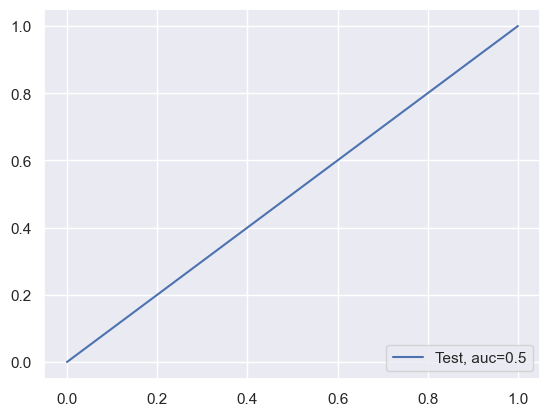

Time Taken by Model: --- 66.71094536781311 seconds ---
--------------------------------------------------------------------------------


In [84]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
Model score: 0.9980688541282632
Confusion Matrix


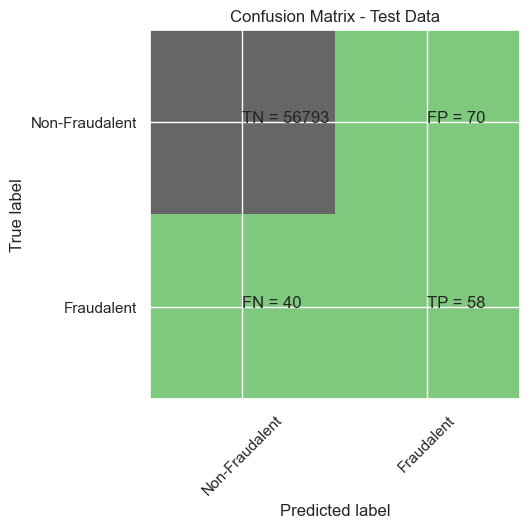

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


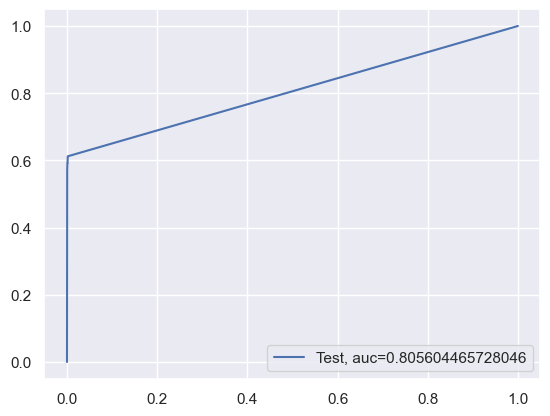

Time Taken by Model: --- 163.73012590408325 seconds ---
--------------------------------------------------------------------------------


In [85]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9985779744035392
Confusion Matrix


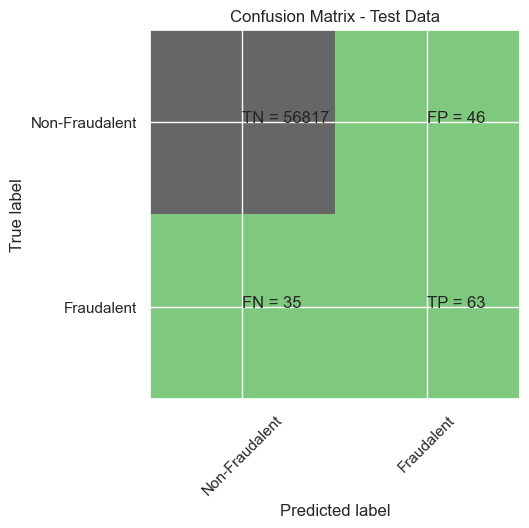

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.58      0.64      0.61        98

    accuracy                           1.00     56961
   macro avg       0.79      0.82      0.80     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8210240904831413
Tree threshold: 1.0
ROC for the test dataset 82.1%


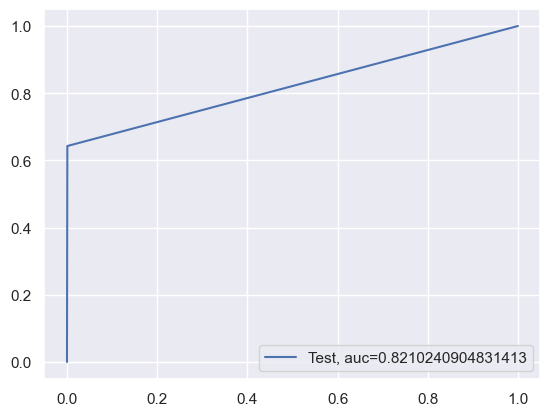

entropy score: 0.9991924299081828
Confusion Matrix


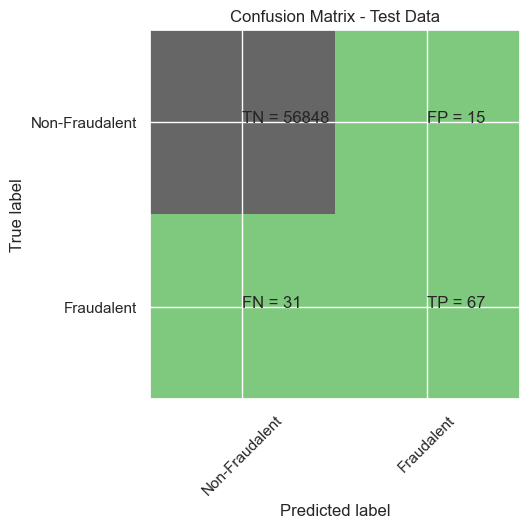

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.82      0.68      0.74        98

    accuracy                           1.00     56961
   macro avg       0.91      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8417048387334112
Tree threshold: 1.0
ROC for the test dataset 84.2%


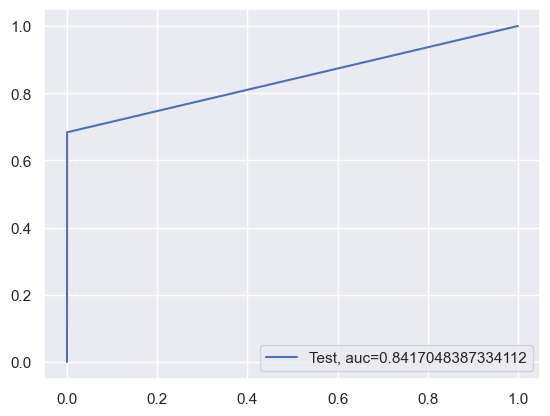

Time Taken by Model: --- 21.462615728378296 seconds ---
--------------------------------------------------------------------------------


In [86]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


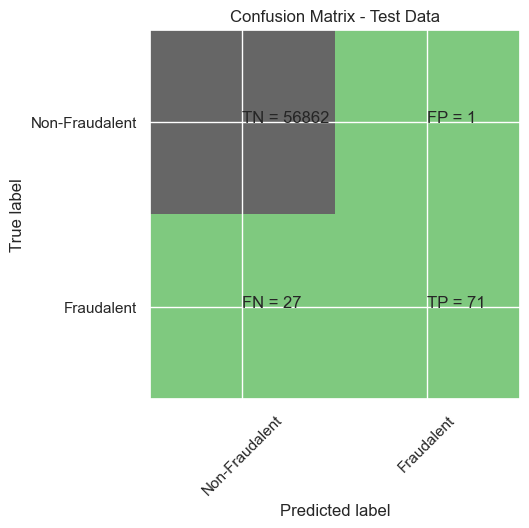

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9409362711020078
Random Forest threshold: 0.02
ROC for the test dataset 94.1%


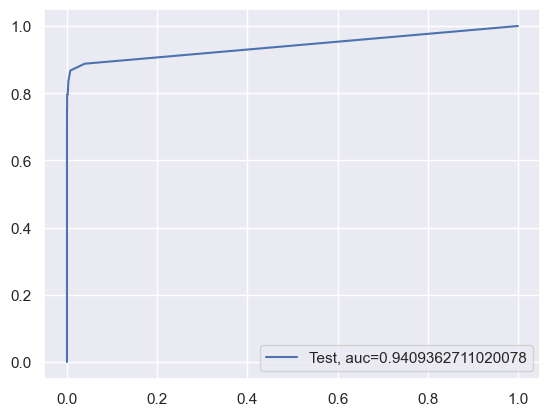

Time Taken by Model: --- 167.79717183113098 seconds ---
--------------------------------------------------------------------------------


In [87]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


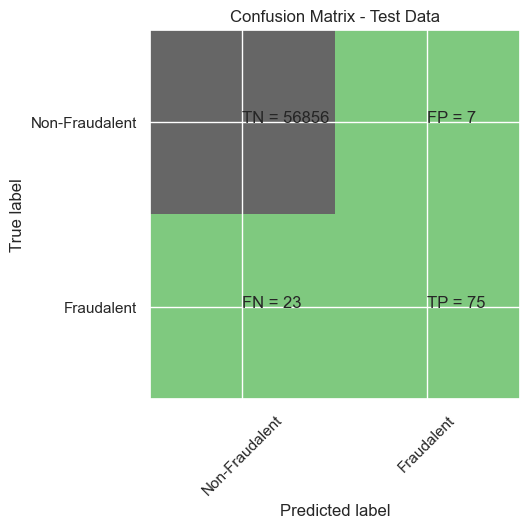

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.77      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9789339719849391
XGBoost threshold: 0.00015485414769500494
ROC for the test dataset 97.9%


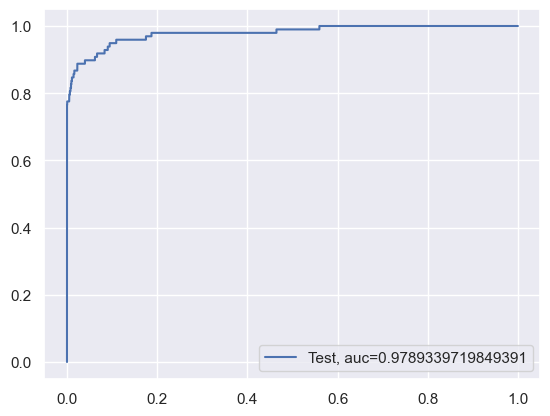

Time Taken by Model: --- 4.08635687828064 seconds ---
--------------------------------------------------------------------------------


In [88]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [89]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                              Power Transformer   
9                              Power Transformer   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16             StratifiedKFold  Cross Validation   
17             StratifiedKFold  Cross Validation   
18             StratifiedKFold  Cross Validation   
19             StratifiedKFold  Cross Validation   
20             StratifiedKFold  Cross Validation   
21             StratifiedKFold  Cross Validation   
22             StratifiedKFold  Cross Validation   
23             StratifiedKFold  Cross Validation   
24  Random Oversampling with StratifiedKFold CV    
25  Random Oversampling with StratifiedKFold CV    
26  Random Oversampling with StratifiedKFold CV    
27  Random Oversampling with StratifiedKFold CV    
28  Random Oversampling with StratifiedKFold CV    
29  Random Oversampling with StratifiedKFold CV    
30  Random Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998315   0.500000        inf  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                    KNN MODEL  0.999298   0.900851   0.200000  
3                                   TREE MODEL  0.998806   0.859015   1.000000  
4                                   TREE MODEL  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999386   0.977586   0.000023  
7                                          SVM  0.998560   0.891323   0.000663  
8   Logistic Regression with L2 Regularisation  0.998315   0.500000        inf  
9   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
10                                   KNN MODEL  0.999228   0.870543   0.200000  
11                                  TREE MODEL  0.998999   0.876097   1.000000  
12                                  TREE MODEL  0.999175   0.887403   1.000000  
13                               Random Forest  0.999544   0.947971   0.020000  
14                                     XGBoost  0.999561   0.972842   0.000111  
15                                         SVM  0.998455   0.468828   0.001839  
16  Logistic Regression with L2 Regularisation  0.998280   0.611162   0.499392  
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
18                                   KNN MODEL  0.999192   0.805746   0.200000  
19                                  TREE MODEL  0.998841   0.826249   1.000000  
20                                  TREE MODEL  0.999017   0.821244   1.000000  
21                               Random Forest  0.999438   0.946472   0.010000  
22                                     XGBoost  0.999438   0.972205   0.000038  
23                                         SVM  0.998280   0.401770   0.004358  
24  Logistic Regression with L2 Regularisation  0.998666   0.643074   0.499975  
25  Logistic Regression with L1 Regularisation  0.998280   0.500000        inf  
26                                   KNN MODEL  0.998069   0.805604   0.200000  
27                                  TREE MODEL  0.998578   0.821024   1.000000  
28        

# Results for Random Oversampling:
Random Oversampling seems to have +ve change in prediction for XGBoost Looking at Accuracy and ROC value 
we have XGBoost which has provided best results for SMOTE oversampling technique

# Oversampling with SMOTE Oversamplng

# We will use SMOTE Oversampling method to handle the class imbalance

First we will display class distibution with and without the SMOTE Oversampling.

Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:

Logistic Regression with L2 Regularisation

Logistic Regression with L1 Regularisation

KNN

Decision tree model with Gini criteria

Decision tree model with Entropy criteria

Random Forest

XGBoost

We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

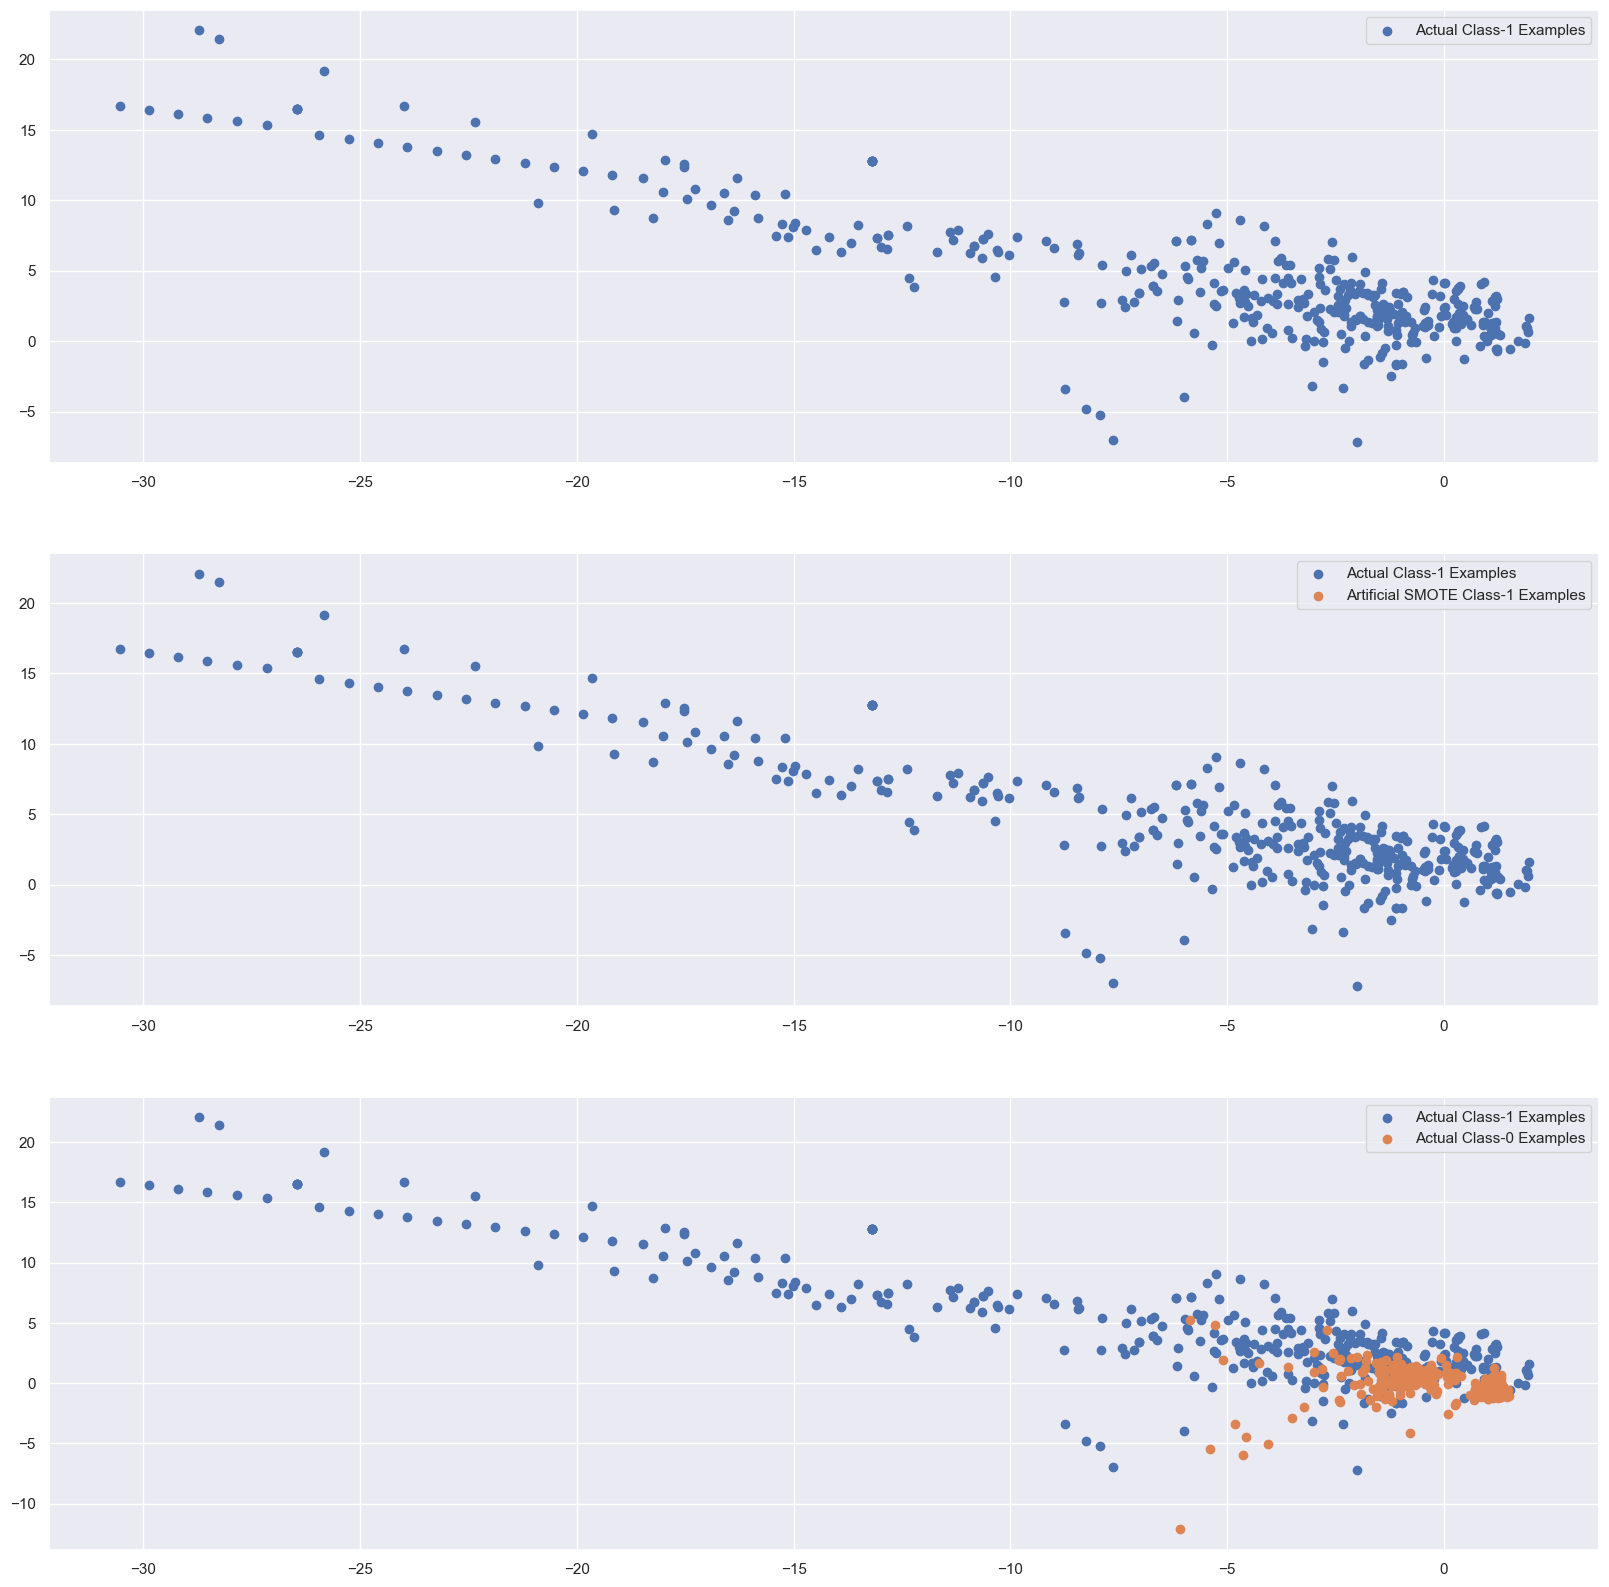

In [114]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")

# Assuming X_train, y_train, and cols are already defined
SMOTE = SMOTE(random_state=0)

X_train_Smote, y_train_Smote = SMOTE.fit_resample(X_train, y_train) 

# Convert to numpy arrays for indexing
X_train_np = X_train.to_numpy()

# Get indices of minority and majority class
minority_indices = np.where(y_train == 1.0)[0]
majority_indices = np.where(y_train == 0.0)[0]

# Extract samples based on indices
X_train_1 = X_train_np[minority_indices]
X_train_0 = X_train_np[majority_indices]

# Create dataframe
cols = X_train.columns  # Assuming cols is defined elsewhere
X_train_Smote_df = pd.DataFrame(data=X_train_Smote, columns=cols)

# Plotting
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(3, 1)

# Plot Actual Class-1 Examples
axs[0].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[0].legend()

# Plot SMOTE Class-1 Examples
axs[1].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[1].scatter(X_train_Smote_df.iloc[minority_indices[len(X_train_1):], 0], 
               X_train_Smote_df.iloc[minority_indices[len(X_train_1):], 1], 
               label='Artificial SMOTE Class-1 Examples')
axs[1].legend()

# Plot Actual Class-1 and Class-0 Examples
axs[2].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[2].scatter(X_train_0[:len(X_train_1), 0], X_train_0[:len(X_train_1), 1], label='Actual Class-0 Examples')
axs[2].legend()

plt.show()

In [90]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
    
    # Create DataFrame for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

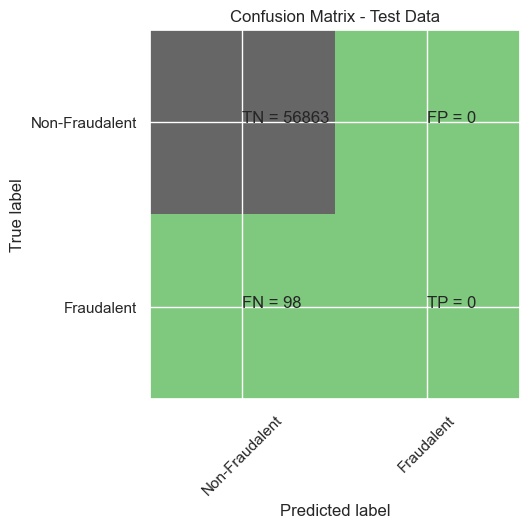

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


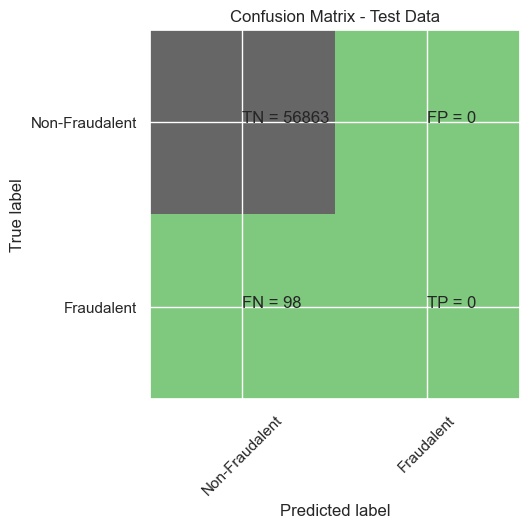

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


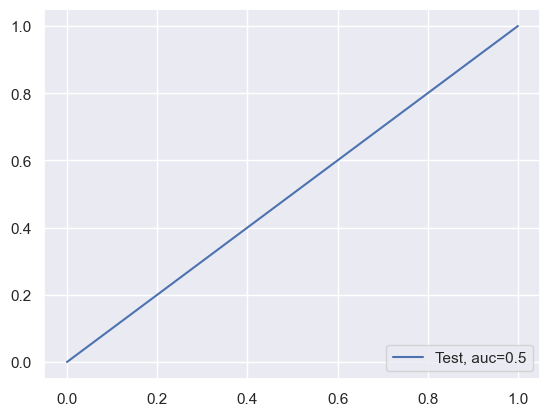

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


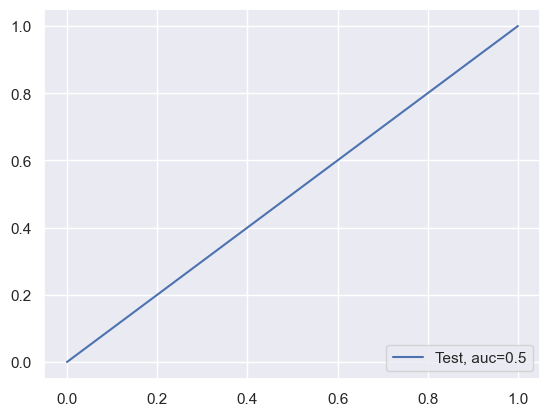

Time Taken by Model: --- 88.13837552070618 seconds ---
--------------------------------------------------------------------------------


In [91]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
Model score: 0.9946805709169432
Confusion Matrix


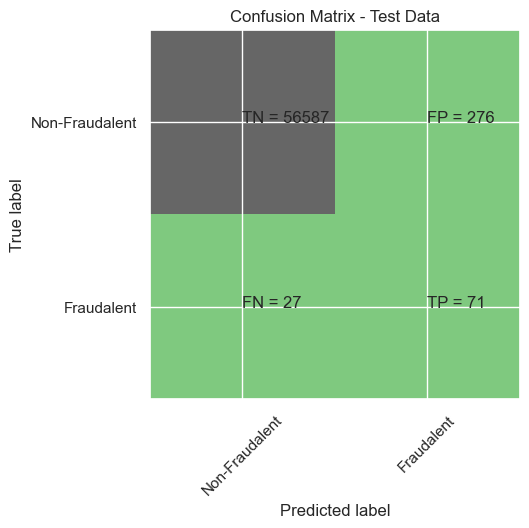

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


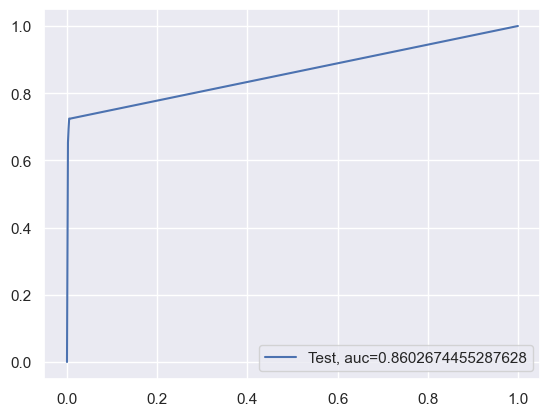

Time Taken by Model: --- 220.45737981796265 seconds ---
--------------------------------------------------------------------------------


In [92]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9977528484401608
Confusion Matrix


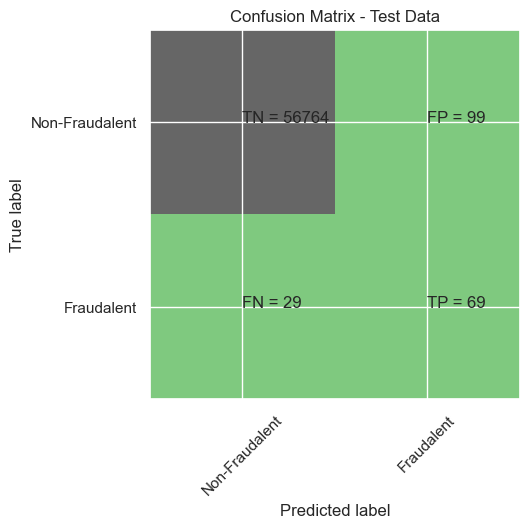

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset 85.1%


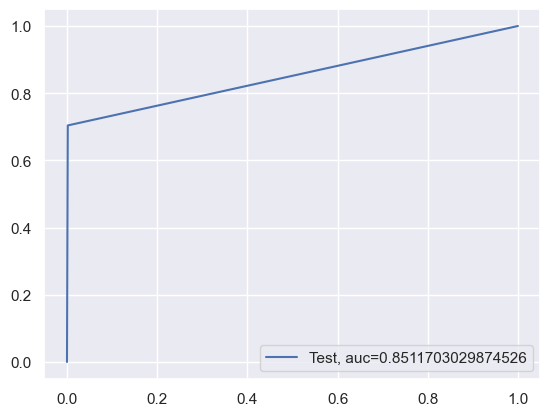

entropy score: 0.9969803900914661
Confusion Matrix


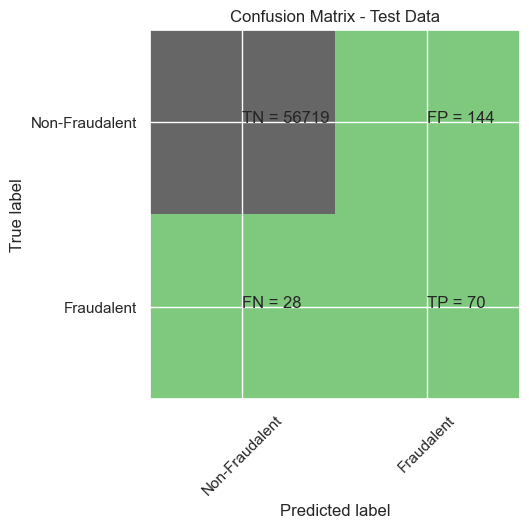

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset 85.6%


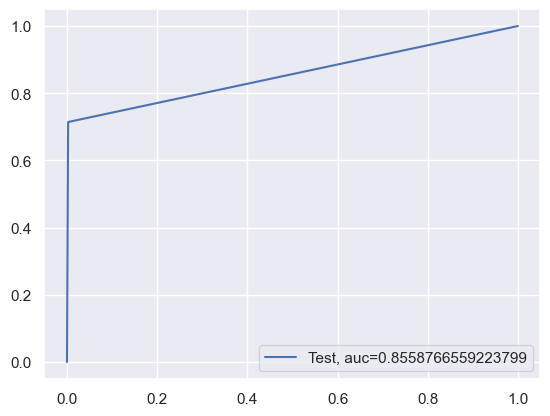

Time Taken by Model: --- 83.0533299446106 seconds ---
--------------------------------------------------------------------------------


In [93]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


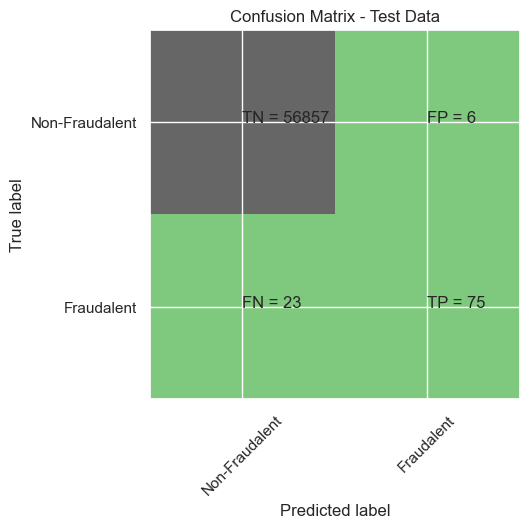

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


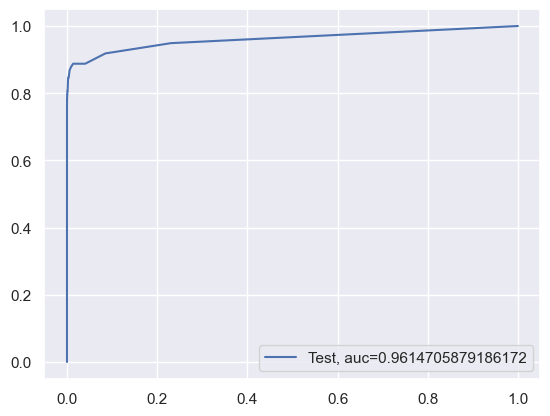

Time Taken by Model: --- 396.7537133693695 seconds ---
--------------------------------------------------------------------------------


In [94]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9994031003669177
Confusion Matrix


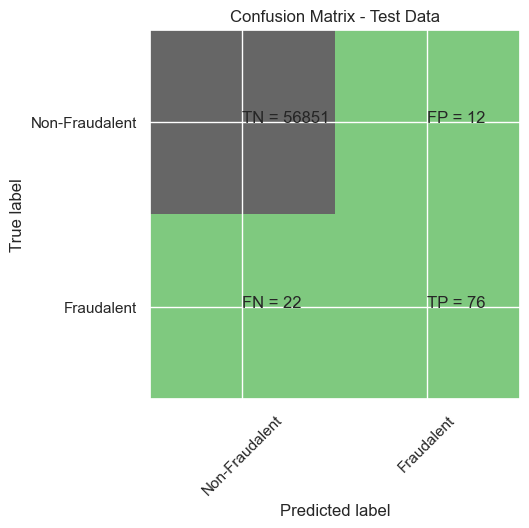

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9704732498841648
XGBoost threshold: 0.00014416704652830958
ROC for the test dataset 97.0%


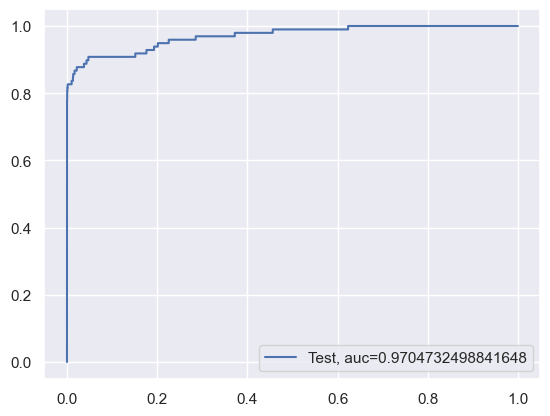

Time Taken by Model: --- 5.0132060050964355 seconds ---
--------------------------------------------------------------------------------


In [95]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [96]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                              Power Transformer   
9                              Power Transformer   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16             StratifiedKFold  Cross Validation   
17             StratifiedKFold  Cross Validation   
18             StratifiedKFold  Cross Validation   
19             StratifiedKFold  Cross Validation   
20             StratifiedKFold  Cross Validation   
21             StratifiedKFold  Cross Validation   
22             StratifiedKFold  Cross Validation   
23             StratifiedKFold  Cross Validation   
24  Random Oversampling with StratifiedKFold CV    
25  Random Oversampling with StratifiedKFold CV    
26  Random Oversampling with StratifiedKFold CV    
27  Random Oversampling with StratifiedKFold CV    
28  Random Oversampling with StratifiedKFold CV    
29  Random Oversampling with StratifiedKFold CV    
30  Random Oversampling with StratifiedKFold CV    
31   SMOTE Oversampling with StratifiedKFold CV    
32   SMOTE Oversampling with StratifiedKFold CV    
33   SMOTE Oversampling with StratifiedKFold CV    
34   SMOTE Oversampling with StratifiedKFold CV    
35   SMOTE Oversampling with StratifiedKFold CV    
36   SMOTE Oversampling with StratifiedKFold CV    
37   SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998315   0.500000        inf  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                    KNN MODEL  0.999298   0.900851   0.200000  
3                                   TREE MODEL  0.998806   0.859015   1.000000  
4                                   TREE MODEL  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999386   0.977586   0.000023  
7                                          SVM  0.998560   0.891323   0.000663  
8   Logistic Regression with L2 Regularisation  0.998315   0.500000        inf  
9   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
10                                   KNN MODEL  0.999228   0.870543   0.200000  
11                                  TREE MODEL  0.998999   0.876097   1.000000  
12                                  TREE MODEL  0.999175   0.887403   1.000000  
13                               Random Forest  0.999544   0.947971   0.020000  
14                                     XGBoost  0.999561   0.972842   0.000111  
15                                         SVM  0.998455   0.468828   0.001839  
16  Logistic Regression with L2 Regularisation  0.998280   0.611162   0.499392  
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
18                                   KNN MODEL  0.999192   0.805746   0.200000  
19                                  TREE MODEL  0.998841   0.826249   1.000000  
20                                  TREE MODEL  0.999017   0.821244   1.000000  
21                               Random Forest  0.999438   0.946472   0.010000  
22                                     XGBoost  0.999438   0.972205   0.000038  
23                                         SVM  0.9

# Results for SMOTE Oversampling:
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

# Oversampling with ADASYN Oversampling
We will use ADASYN Oversampling method to handle the class imbalance

First we will display class distibution with and without the ADASYN Oversampling.

Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:

Logistic Regression with L2 Regularisation

Logistic Regression with L1 Regularisation

KNN

Decision tree model with Gini criteria

Decision tree model with Entropy criteria

Random Forest

XGBoost

We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique

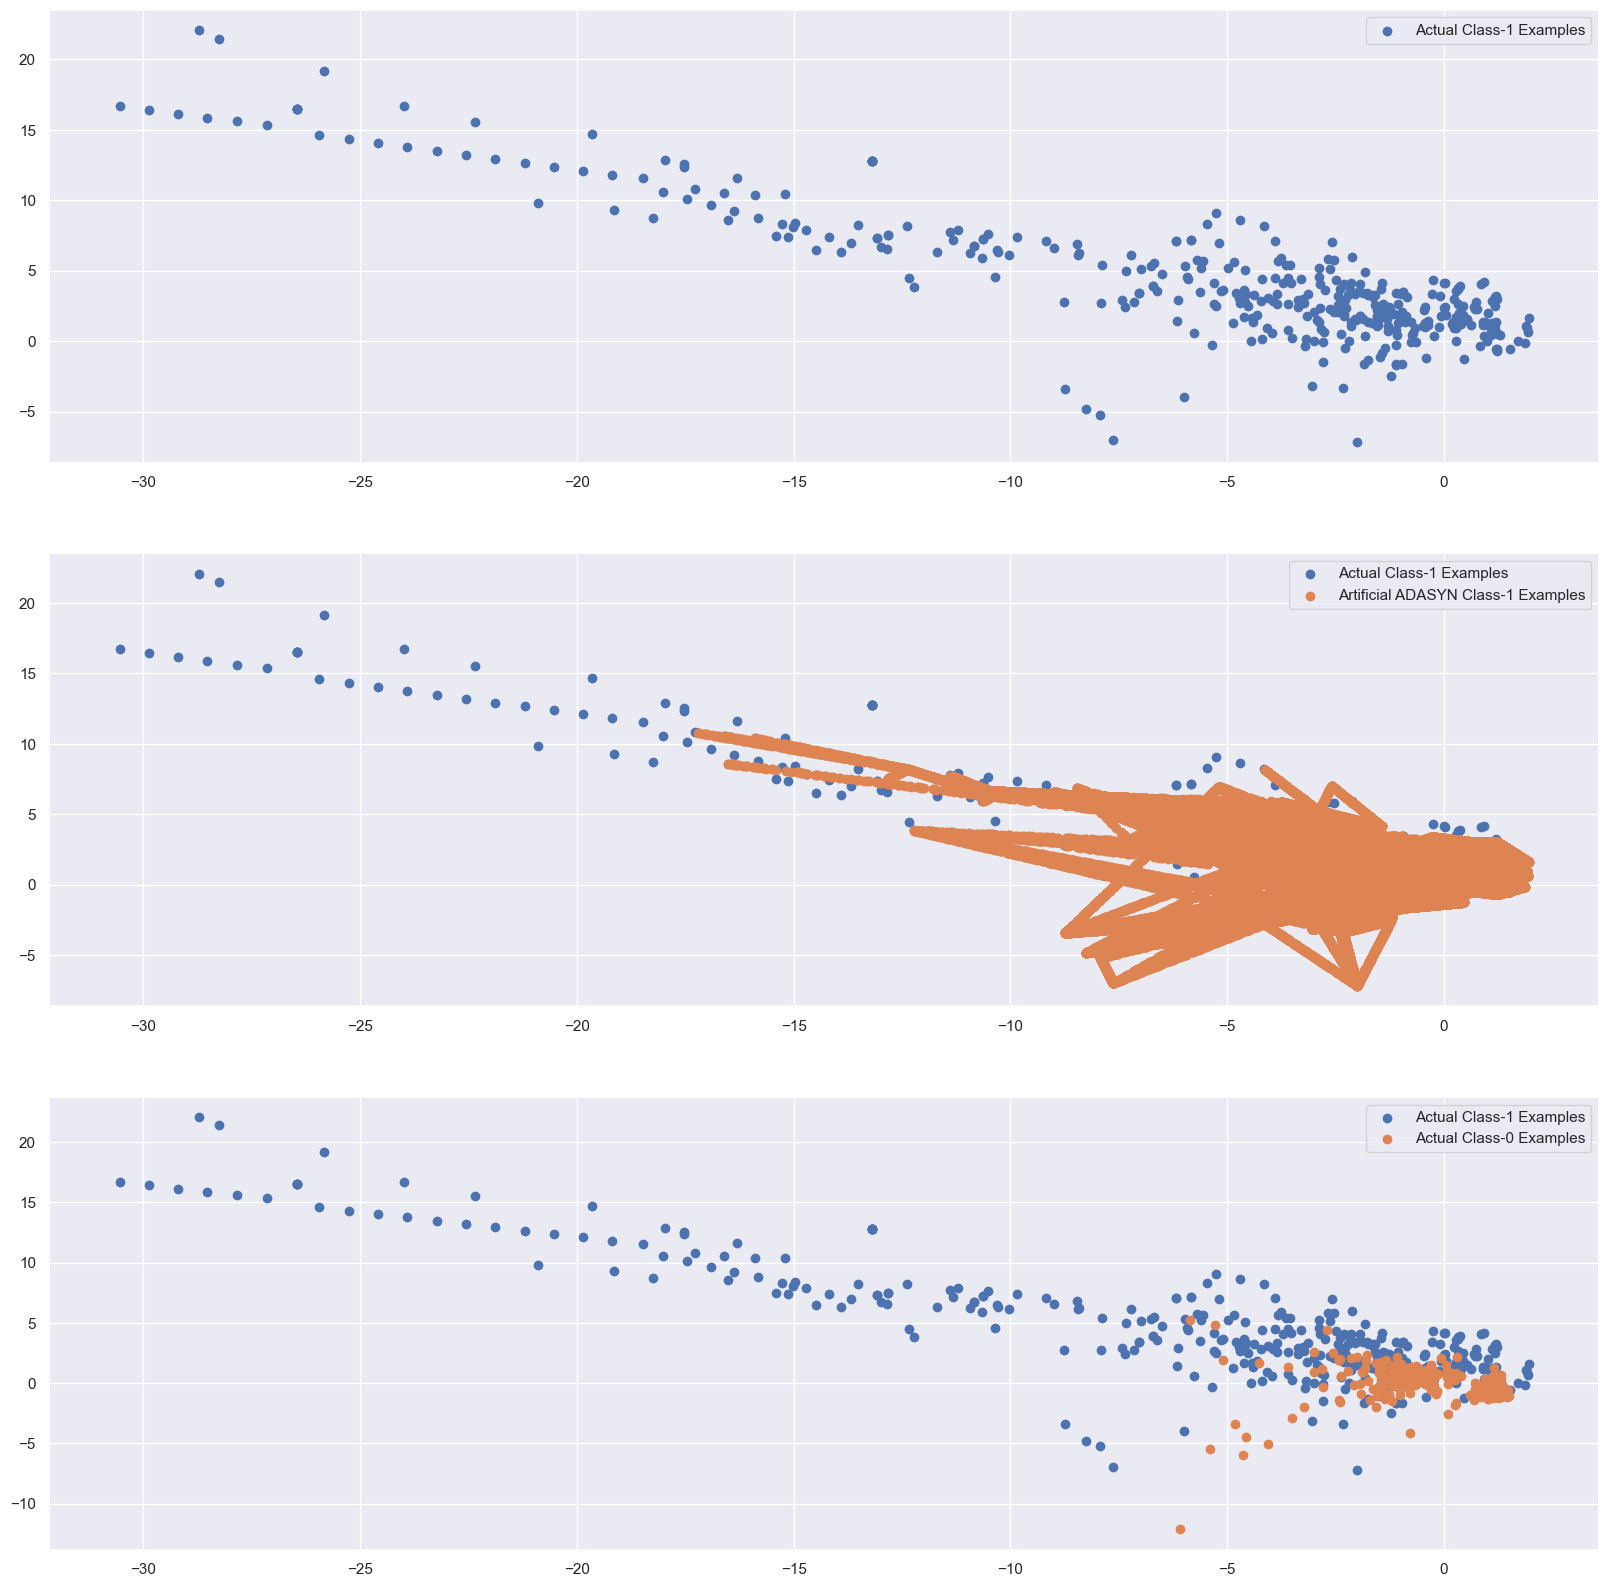

In [118]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import numpy as np

ADASYN = ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)

# Convert DataFrame to numpy arrays
X_train_adasyn_np = X_train_ADASYN.values
y_train_adasyn_np = y_train_ADASYN.values

# Extract artificial samples from ADASYN
X_train_adasyn_1 = X_train_adasyn_np[len(X_train):]

X_train_1 = X_train_np[np.where(y_train == 1.0)]
X_train_0 = X_train_np[np.where(y_train == 0.0)]

plt.rcParams['figure.figsize'] = [20, 20]

# Plotting
fig, axs = plt.subplots(3, 1)

# Plot Actual Class-1 Examples
axs[0].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[0].legend()

# Plot Actual Class-1 and ADASYN Examples
axs[1].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[1].scatter(X_train_adasyn_1[:, 0], X_train_adasyn_1[:, 1], label='Artificial ADASYN Class-1 Examples')
axs[1].legend()

# Plot Actual Class-1 and Class-0 Examples
axs[2].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[2].scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
axs[2].legend()

plt.show()

In [97]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
  #Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.6091741619819793
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-2.01595537e-05  1.72317688e-05 -3.64909067e-05  3.39290450e-05
  -1.46234036e-05 -8.46815505e-06 -2.20942850e-05  3.85352422e-07
  -1.34235180e-05 -3.75798463e-05  2.79794199e-05 -4.50836936e-05
  -2.12360047e-06 -5.56215470e-05  1.17193947e-06 -2.74594763e-05
  -4.06813002e-05 -1.20266028e-05  4.49719240e-06  1.33830143e-06
   6.32715682e-06  5.58244410e-07 -2.26605364e-06 -8.54000002e-07
  -5.65808665e-07 -2.03181861e-07  2.36428895e-06  7.75570254e-07
   1.29444742e-03 -2.92744751e-05]]
[-9.9952445e-07]
{1: array([[0.60589839, 0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 ,
        0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 ,
        0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 ,
        0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 ],
       [0.60637663, 0.60864573, 0.60864573, 0.60864573, 0.608

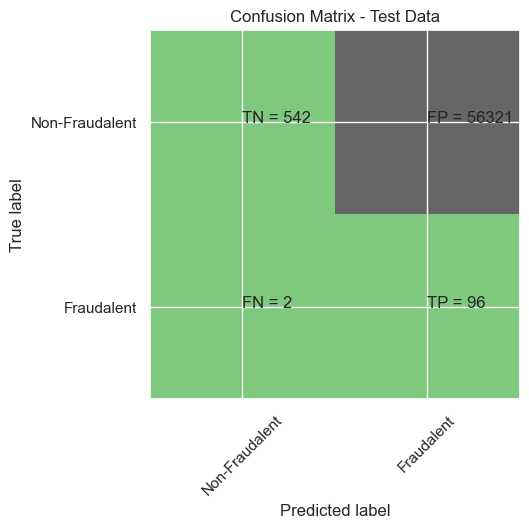

classification Report
              precision    recall  f1-score   support

           0       1.00      0.01      0.02     56863
           1       0.00      0.98      0.00        98

    accuracy                           0.01     56961
   macro avg       0.50      0.49      0.01     56961
weighted avg       0.99      0.01      0.02     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


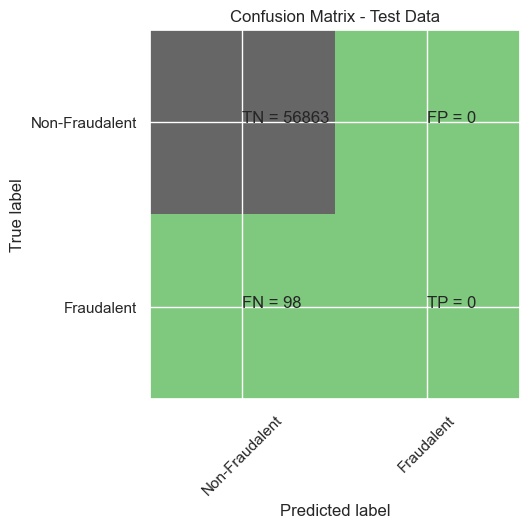

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.4511041037768184
l2 threshold: 0.576281911186326
ROC for the test dataset 45.1%


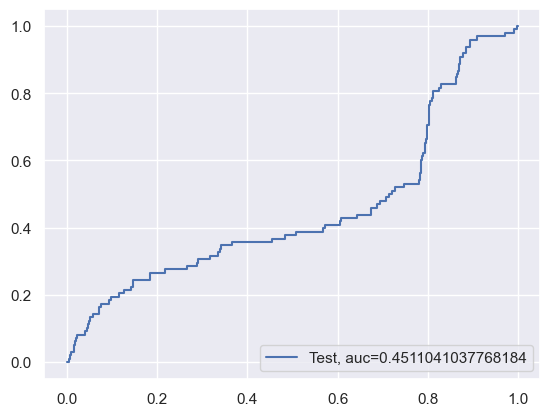

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


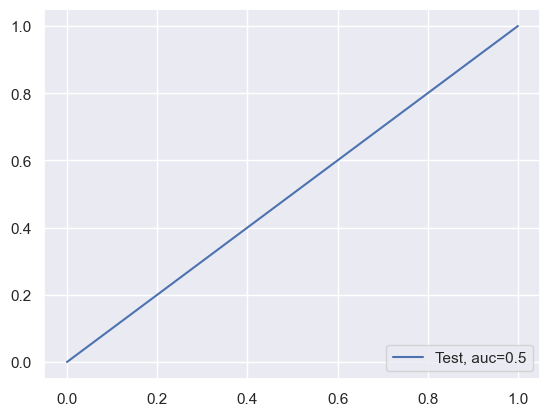

Time Taken by Model: --- 93.0848331451416 seconds ---
--------------------------------------------------------------------------------


In [98]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
Model score: 0.9945050122013307
Confusion Matrix


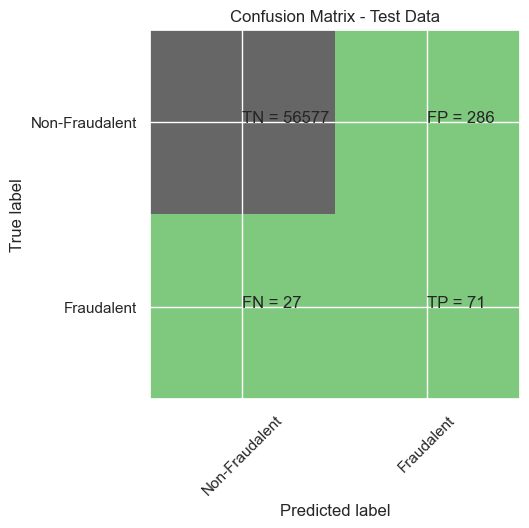

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8601937811862167
KNN threshold: 0.6
ROC for the test dataset 86.0%


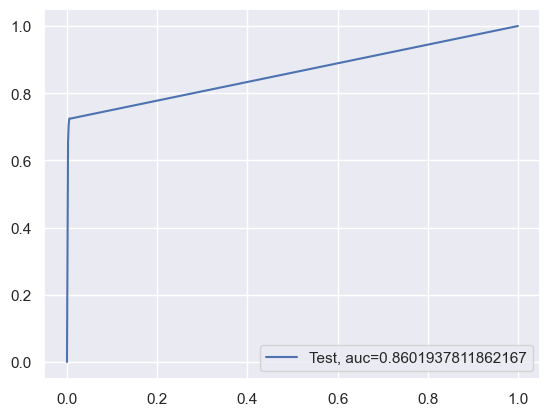

Time Taken by Model: --- 214.6032474040985 seconds ---
--------------------------------------------------------------------------------


In [99]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9979459630273345
Confusion Matrix


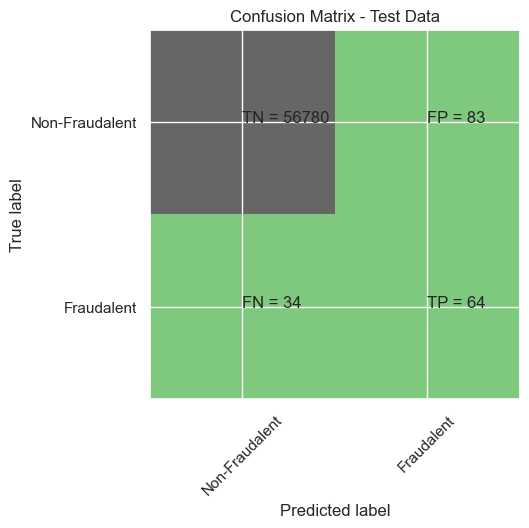

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8258007879303172
Tree threshold: 1.0
ROC for the test dataset 82.6%


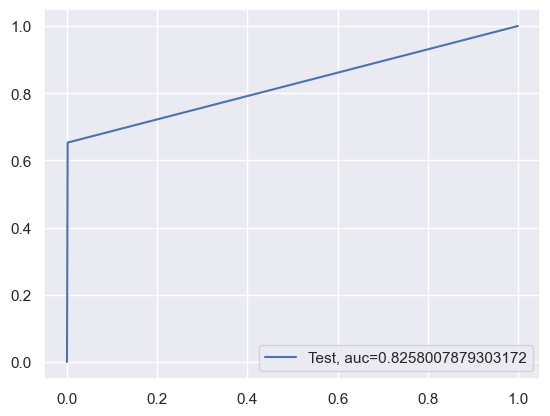

entropy score: 0.9954179175225154
Confusion Matrix


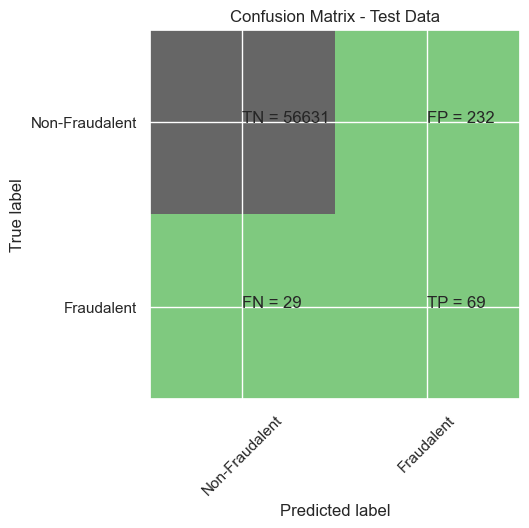

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8500008254713172
Tree threshold: 1.0
ROC for the test dataset 85.0%


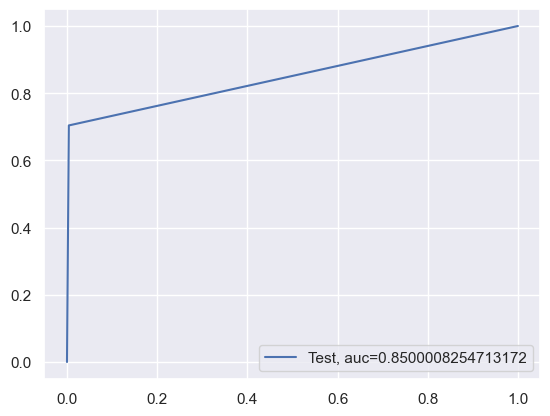

Time Taken by Model: --- 76.99533915519714 seconds ---
--------------------------------------------------------------------------------


In [100]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


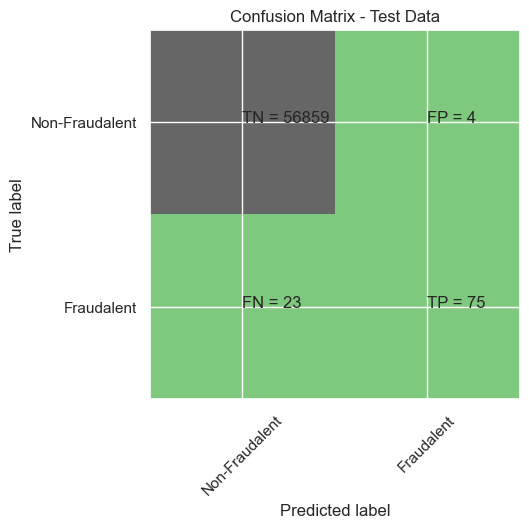

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9632269575962563
Random Forest threshold: 0.03
ROC for the test dataset 96.3%


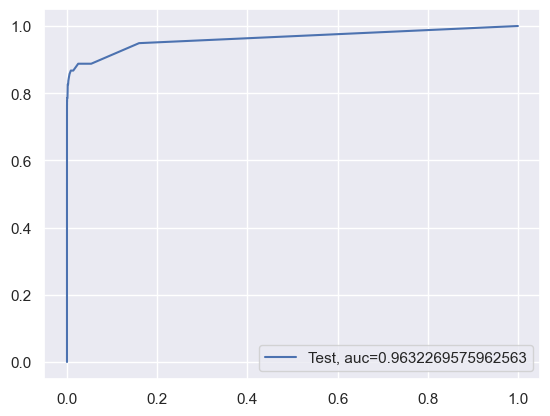

Time Taken by Model: --- 406.3880150318146 seconds ---
--------------------------------------------------------------------------------


In [101]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.999350432752234
Confusion Matrix


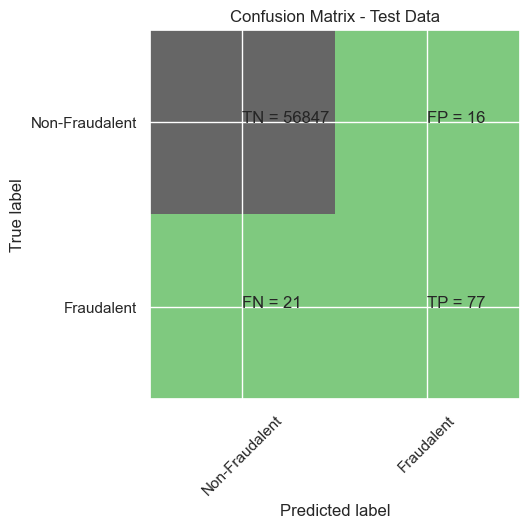

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.79      0.81        98

    accuracy                           1.00     56961
   macro avg       0.91      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9696561230052754
XGBoost threshold: 0.00012316476204432547
ROC for the test dataset 97.0%


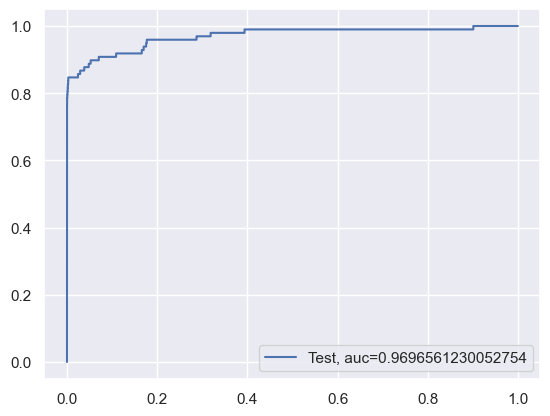

Time Taken by Model: --- 4.766932249069214 seconds ---
--------------------------------------------------------------------------------


In [102]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [103]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                              Power Transformer   
9                              Power Transformer   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16             StratifiedKFold  Cross Validation   
17             StratifiedKFold  Cross Validation   
18             StratifiedKFold  Cross Validation   
19             StratifiedKFold  Cross Validation   
20             StratifiedKFold  Cross Validation   
21             StratifiedKFold  Cross Validation   
22             StratifiedKFold  Cross Validation   
23             StratifiedKFold  Cross Validation   
24  Random Oversampling with StratifiedKFold CV    
25  Random Oversampling with StratifiedKFold CV    
26  Random Oversampling with StratifiedKFold CV    
27  Random Oversampling with StratifiedKFold CV    
28  Random Oversampling with StratifiedKFold CV    
29  Random Oversampling with StratifiedKFold CV    
30  Random Oversampling with StratifiedKFold CV    
31   SMOTE Oversampling with StratifiedKFold CV    
32   SMOTE Oversampling with StratifiedKFold CV    
33   SMOTE Oversampling with StratifiedKFold CV    
34   SMOTE Oversampling with StratifiedKFold CV    
35   SMOTE Oversampling with StratifiedKFold CV    
36   SMOTE Oversampling with StratifiedKFold CV    
37   SMOTE Oversampling with StratifiedKFold CV    
38  ADASYN Oversampling with StratifiedKFold CV    
39  ADASYN Oversampling with StratifiedKFold CV    
40  ADASYN Oversampling with StratifiedKFold CV    
41  ADASYN Oversampling with StratifiedKFold CV    
42  ADASYN Oversampling with StratifiedKFold CV    
43  ADASYN Oversampling with StratifiedKFold CV    
44  ADASYN Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998315   0.500000        inf  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                    KNN MODEL  0.999298   0.900851   0.200000  
3                                   TREE MODEL  0.998806   0.859015   1.000000  
4                                   TREE MODEL  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999386   0.977586   0.000023  
7                                          SVM  0.998560   0.891323   0.000663  
8   Logistic Regression with L2 Regularisation  0.998315   0.500000        inf  
9   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
10                                   KNN MODEL  0.999228   0.870543   0.200000  
11                                  TREE MODEL  0.998999   0.876097   1.000000  
12                                  TREE MODEL  0.999175   0.887403   1.000000  
13                               Random Forest  0.999544   0.947971   0.020000  
14                                     XGBoost  0.999561   0.972842   0.000111  
15                                         SVM  0.998455   0.468828   0.001839  
16  Logistic Regression with L2 Regularisation  0.998280   0.611162   0.499392  
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
18                                   KNN MODEL  0.999192   0.805746   0.200000  
19         

# Results for ADASYN Oversampling:
Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

# Overall conclusion after running models on Oversampled data:
Looking all the  above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. 
So we can try to tune the hyperparameters of this model to get best results

# Hyperparameter tunning 
HPT - XGboost Regression

In [104]:
#Lets tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'n_estimators':range(60,130,150),
 'learning_rate':[0.05,0.1,0.125,0.15,0.2],
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]

    
}
gsearch1 = RandomizedSearchCV(
    estimator=XGBClassifier(
        base_score=0.5, 
        booster='gbtree', 
        colsample_bylevel=1,
        colsample_bynode=1,
        max_delta_step=0,
        missing=None, 
        n_jobs=1,
        nthread=None,  
        objective='binary:logistic', 
        random_state=42,
        reg_alpha=0, 
        reg_lambda=1, 
        scale_pos_weight=1, 
        seed=None,
        silent=None, 
        subsample=1, 
        verbosity=1
    ), 
        param_distributions=param_test, 
    scoring='roc_auc', 
    n_jobs=4, 
    cv=5
)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([7.85602694, 5.95873256, 6.35821776, 7.51615005, 7.38009129,
         7.26810603, 5.44314747, 5.56880889, 5.36956344, 5.89505434]),
  'std_fit_time': array([0.2499223 , 0.12096585, 0.2559019 , 0.20876099, 0.13211642,
         0.03117356, 0.08986314, 0.12559497, 0.03539805, 0.3944083 ]),
  'mean_score_time': array([0.05169287, 0.01639204, 0.01534896, 0.01644564, 0.01415462,
         0.01435518, 0.01455154, 0.01335592, 0.01335859, 0.0148829 ]),
  'std_score_time': array([0.02839547, 0.00046069, 0.00079767, 0.00295783, 0.00074694,
         0.00072855, 0.00135209, 0.00079718, 0.00057878, 0.00317931]),
  'param_subsample': masked_array(data=[0.8, 0.8, 0.7, 0.8, 0.8, 0.8, 0.7, 0.8, 0.7, 0.7],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60, 60, 60, 60, 60, 60],
               mask=[False, 

In [105]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np

# Define the classifier
clf = XGBClassifier(
    base_score=0.5, 
    booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=1, 
    gamma=0.1,
    learning_rate=0.2, 
    max_delta_step=0, 
    max_depth=4,
    min_child_weight=4, 
    missing=-999,  # Provide a numeric value for missing
    n_estimators=60, 
    n_jobs=1,
    objective='binary:logistic', 
    random_state=42,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    seed=None,
    silent=None, 
    subsample=1, 
    verbosity=1
)

# Fit the classifier on the balanced dataset
clf.fit(X_over, y_over)

# Score on test data
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBoost ROC AUC: {0}".format(XGB_roc_value))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost optimal threshold: {0}".format(optimal_threshold))

Model Accuracy: 0.998771088990713
XGBoost ROC AUC: 0.9793554109824293
XGBoost optimal threshold: 0.06971293687820435


# Print the important features of the best model to understand the dataset

In [106]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

Top var = 14
2nd Top var = 4
3rd Top var = 12


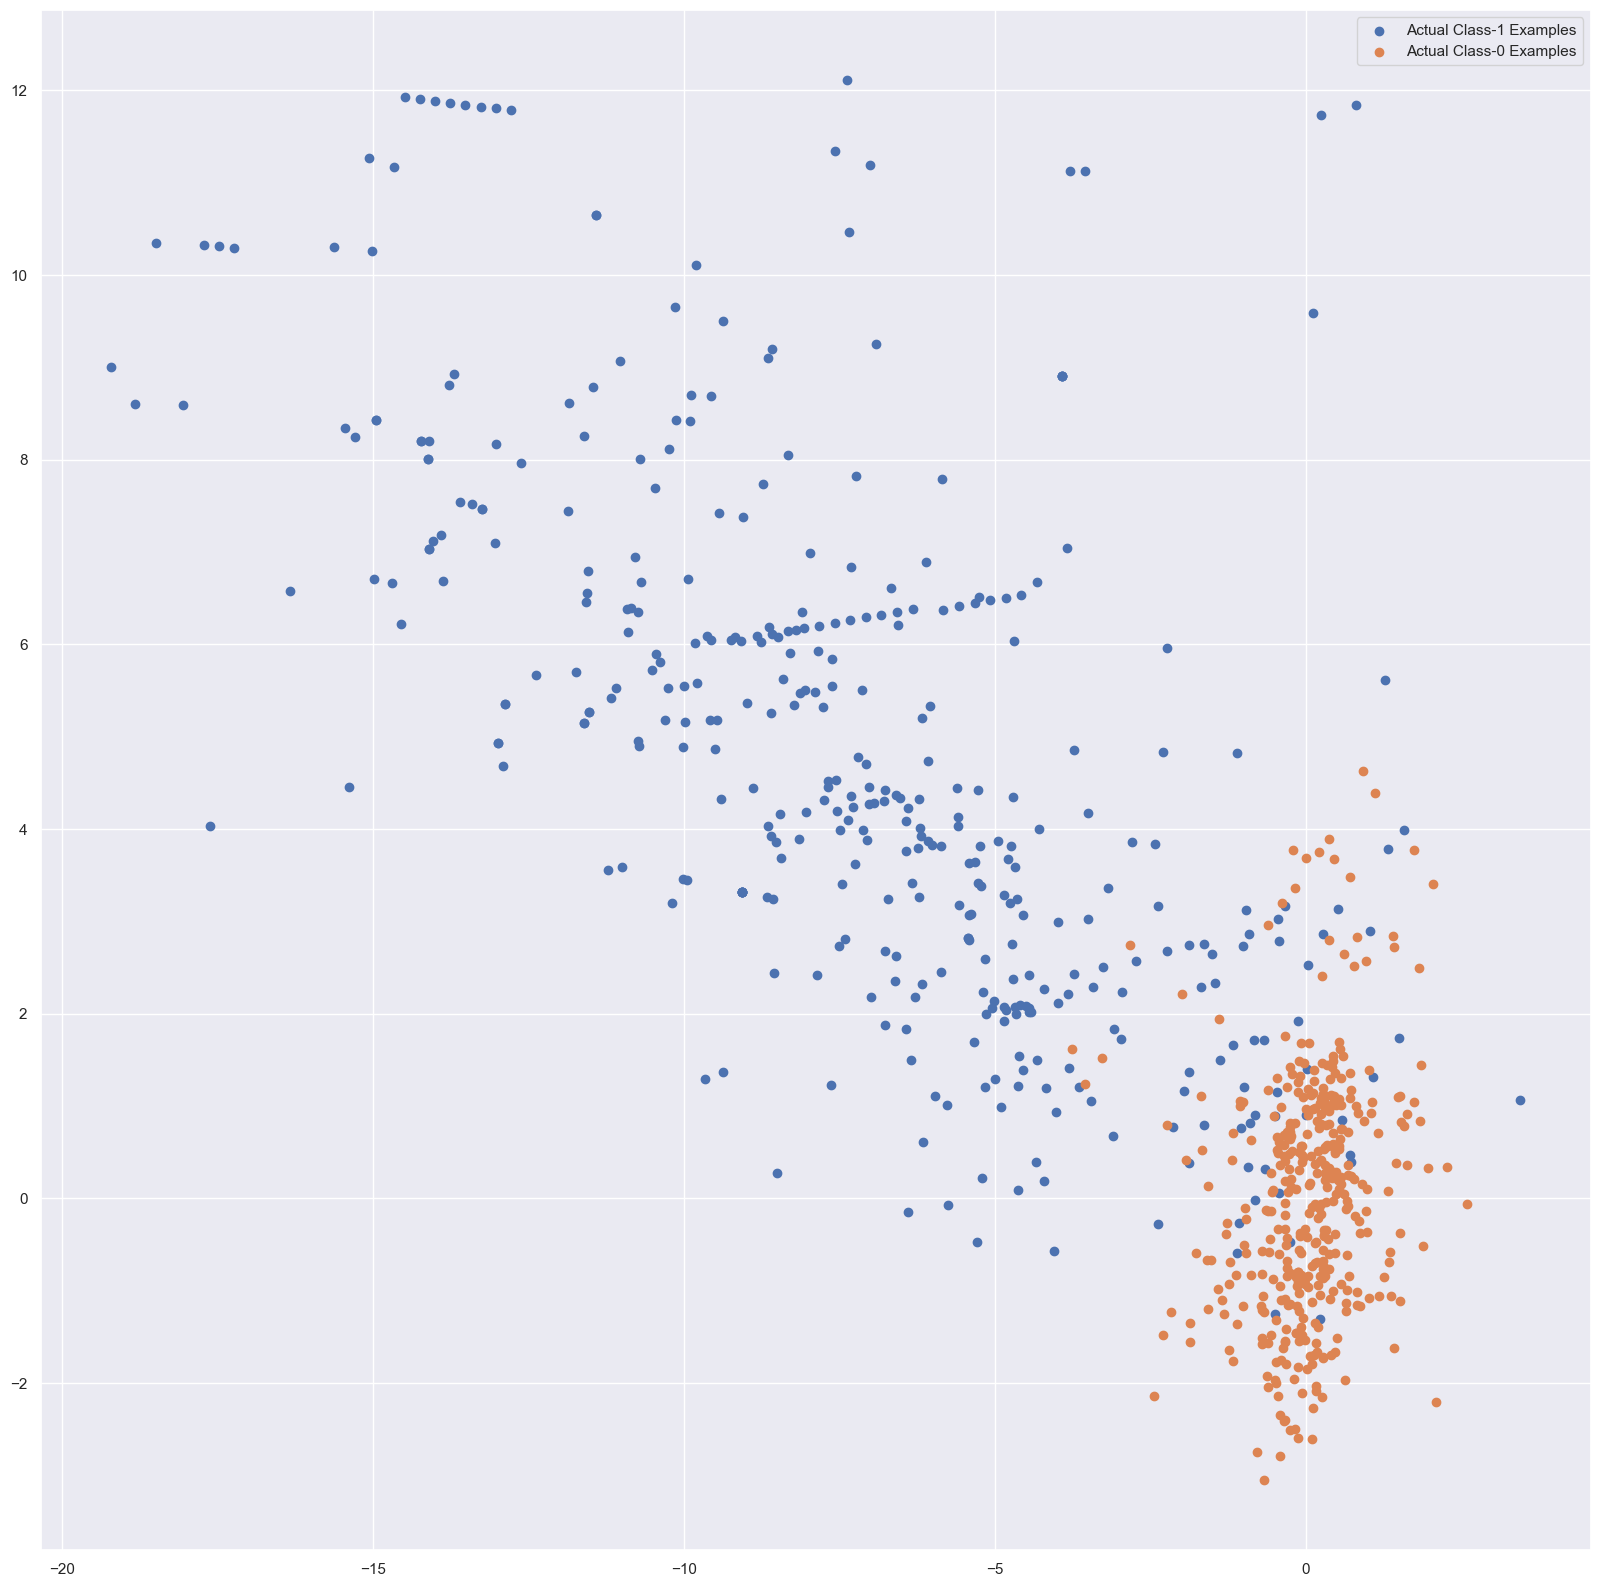

In [107]:
# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [108]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9793554109824293
XGBoost threshold: 0.06971293687820435


# Model Selection:

Conclusion 
In the OverSampling case of all the Model that i build i found that XGBOOST MODEL with random oversampling with tratified kfoldCV give the best accuracy and roc on oversample data . 
How ever of all the model i created i found that XGboost with Random Oversampling with StratifiedKFold CV(without any hyperparameter tuning ) give us the best result .